In [242]:
# **Reading, Understanding and cleaning the data**

In [243]:
# Importing all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [244]:
# Reading the data

lead = pd.read_csv("C:\\Users\\R R\\Desktop\\Lead Scoring Assignment\\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [245]:
lead.shape

(9240, 37)

In [246]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [247]:
# There is a huge leap in some of the features from 75% to max

In [248]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [249]:
# Converting Select value to null in Columns Specialization, How did you hear about X Education and Lead Profile 
# as they mean they have choosen the default value(Did not want to mention any paricular details)

In [250]:
lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [251]:
# Checking for Nulls

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [252]:
# Checking the percentage of missing values# There are a lot of nulls.

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [253]:
# 1.1 Data Cleaning

#1.1.1 We will drop the columns 'Prospect ID', 'Country' and 'City' as they are not relevant to model building.

# We will drop columns 'Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 
# 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score' 
# as they have a lot of null values and would not affect the target feature.

In [254]:
lead = lead.drop(['Prospect ID', 'Country', 'City', 'Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 
                   'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [255]:
# Checking for nulls and cleaning them

lead.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [256]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [257]:
# As the columns 'What is your current occupation' and 'What matters most to you in choosing a course' have around 29% nulls,
# we will impute them with 'Unemployed' and 'Better Career Prospects' respectively as they occur maxmimum number of times(mode)

In [258]:
lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0], inplace = True)
lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0], inplace = True)


In [259]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [260]:
# Removing the rows with null values as their low percentage will not affect much

lead = lead.dropna()

In [261]:
#Checking for nulls again

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [262]:
# The columns 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' have 0 as thier value but it is illogical
# as the people had to visit the website atleast once to go through the courses
# We will use the median of each column to replace the 0s

In [263]:
lead['TotalVisits'] = lead['TotalVisits'].replace(0, lead['TotalVisits'].median())
lead['Total Time Spent on Website'] = lead['Total Time Spent on Website'].replace(0, lead['Total Time Spent on Website'].median())
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(0, lead['Page Views Per Visit'].median())


In [264]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,3.0,246,2.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [265]:
# Dropping the columns 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
# 'Get updates on DM Content', 'I agree to pay the amount through cheque' as they have only one value and do not provide variance 
# for the data

In [266]:
lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,3.0,246,2.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [267]:
# Visualizing the Data
## This is done to check multicollinearity and the association of predictors with the outcome variable

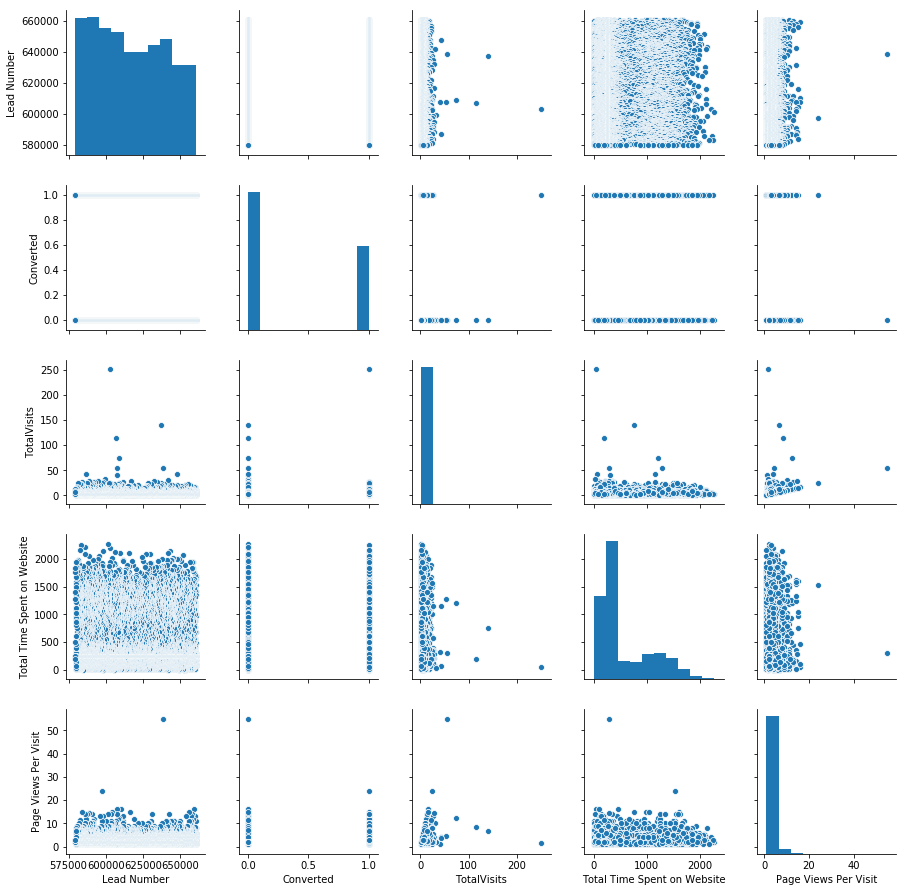

In [268]:
# Visualizing Numerical Variables
sns.pairplot(lead)
plt.show()

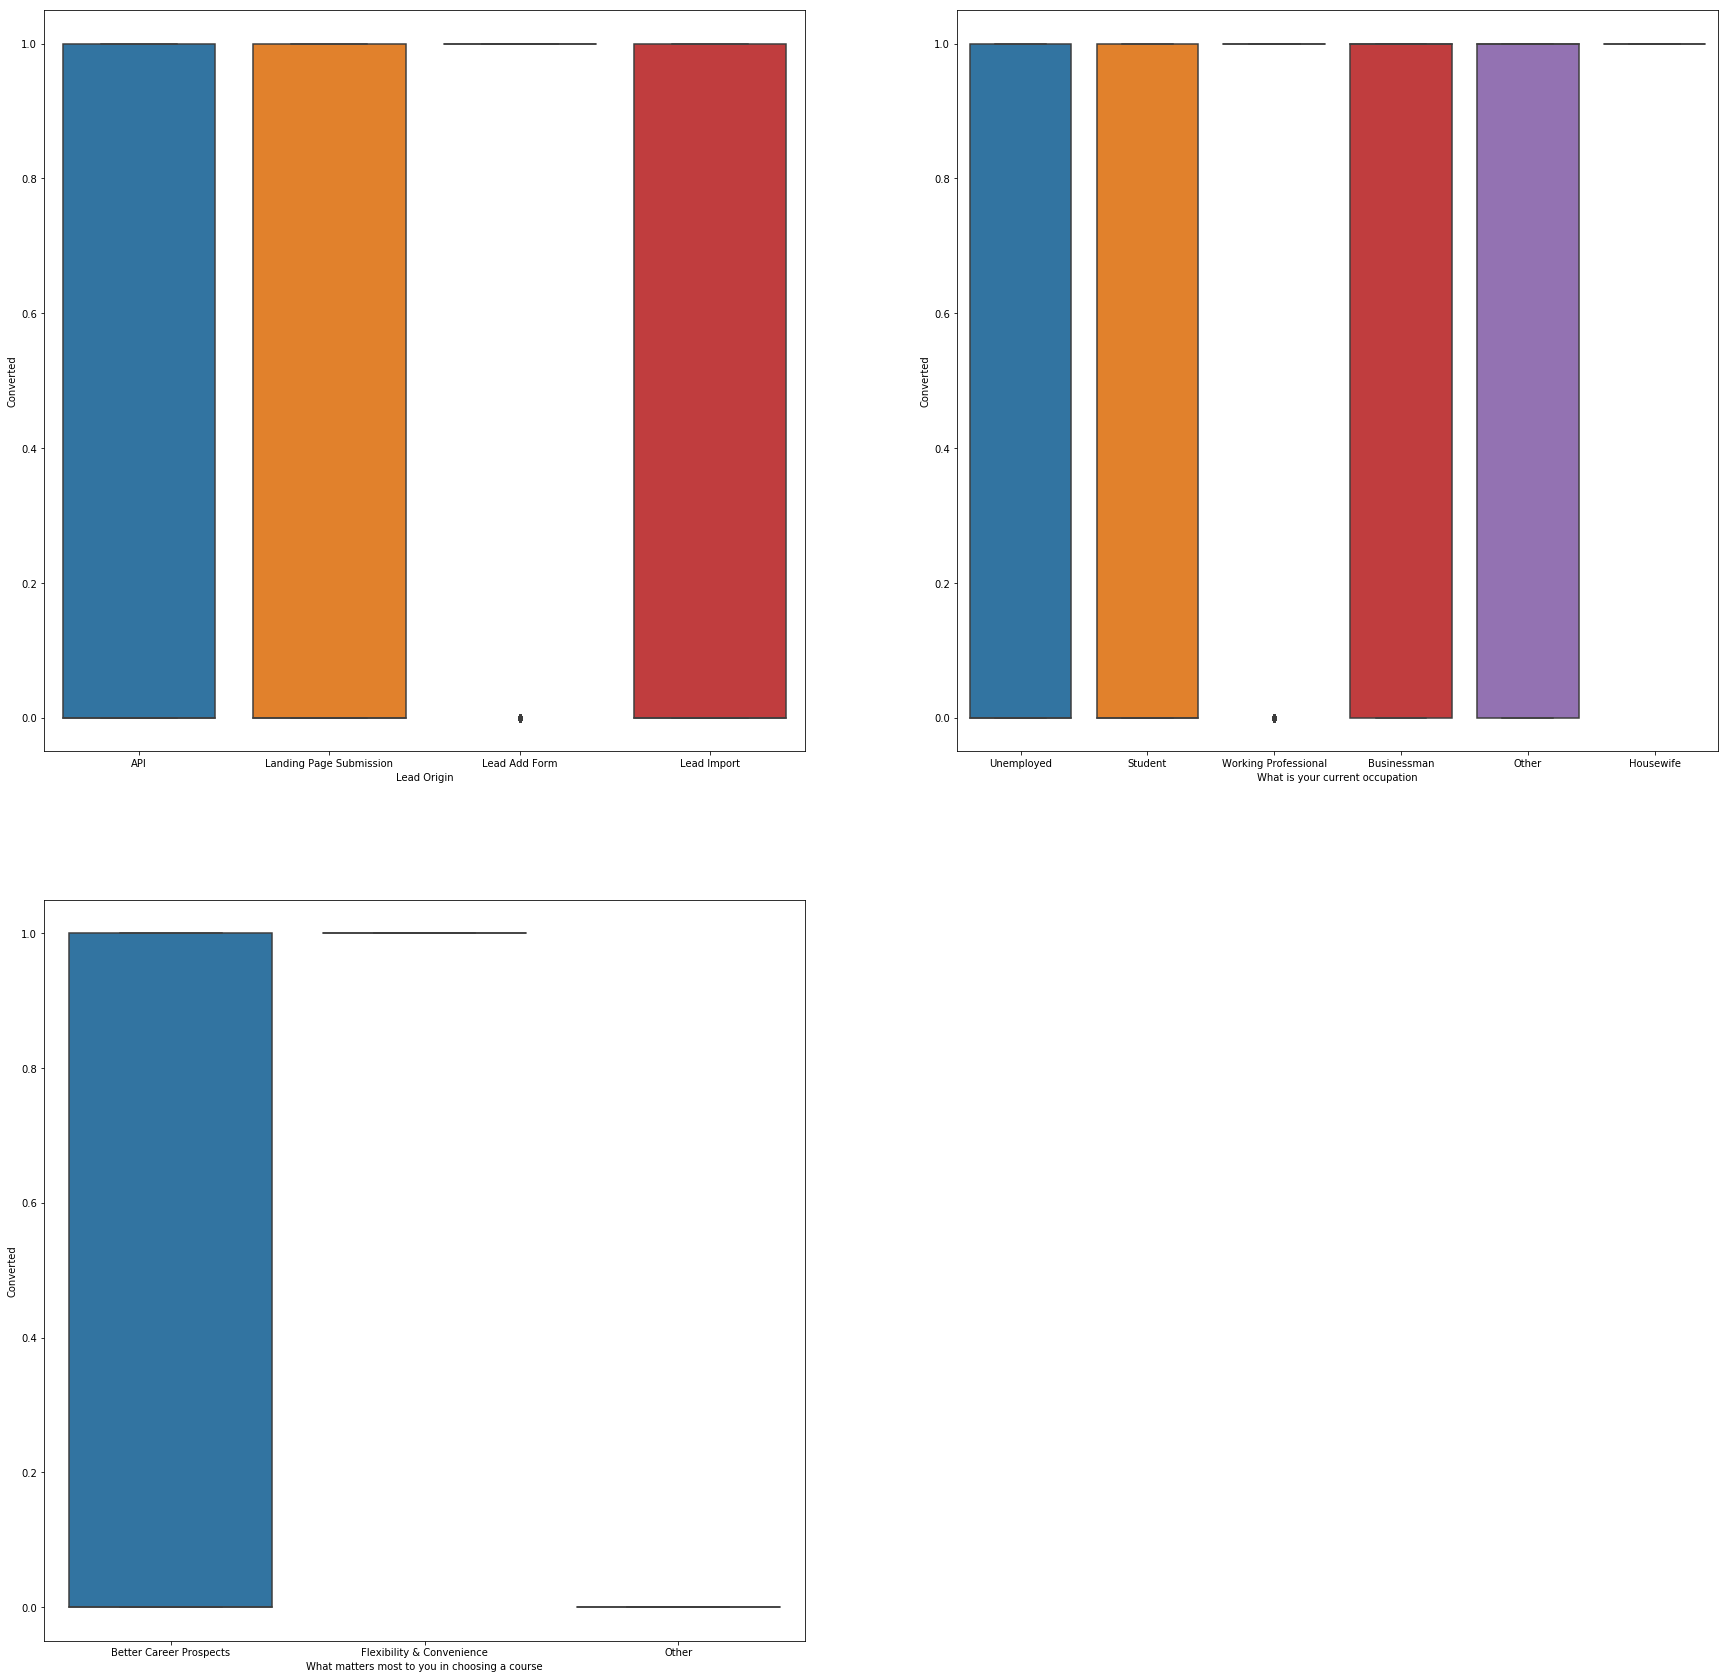

In [269]:
# Visualizing the Categorical Variables with the Target Variable

plt.figure(figsize = (30, 30))
plt.subplot(2,2,1)
sns.boxplot(x = 'Lead Origin', y = 'Converted', data = lead)
plt.subplot(2,2,2)
sns.boxplot(x = 'What is your current occupation', y = 'Converted', data = lead)
plt.subplot(2,2,3)
sns.boxplot(x = 'What matters most to you in choosing a course', y = 'Converted', data = lead)


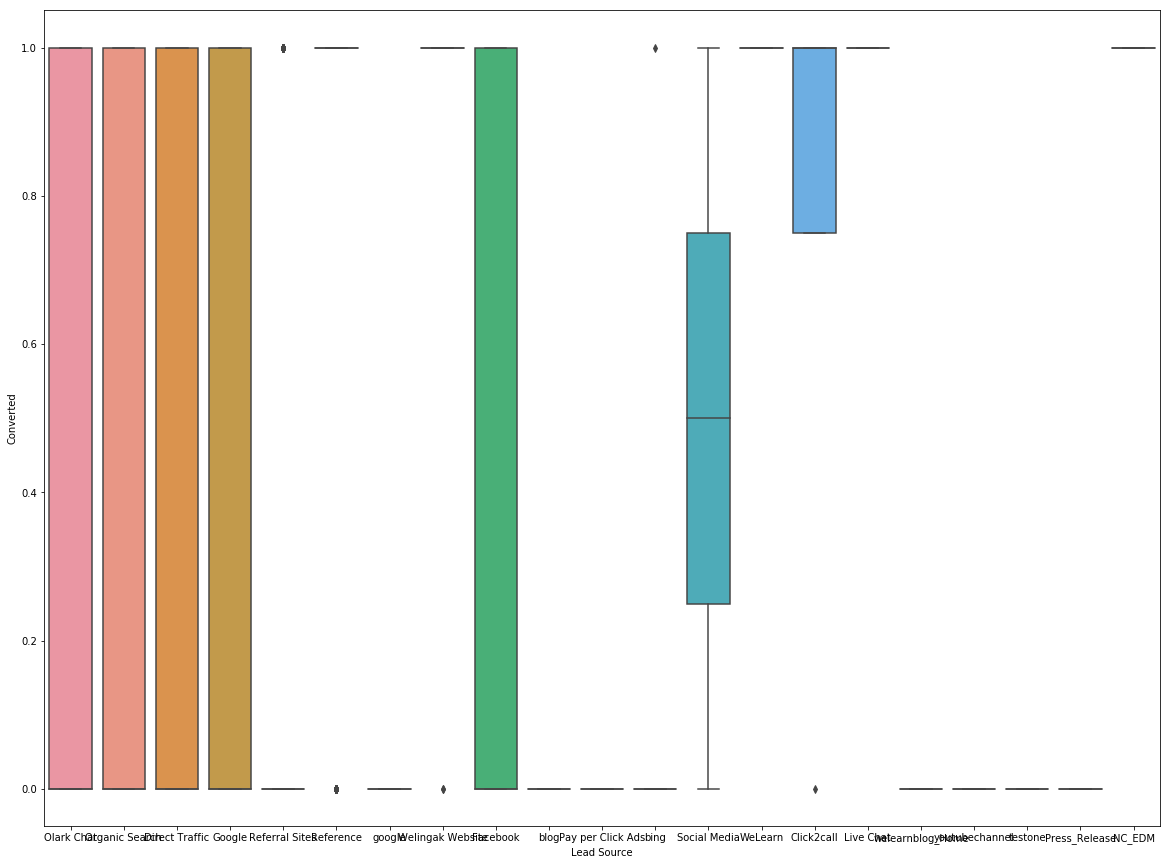

In [270]:
# Visualizing 'Lead Source'

plt.figure(figsize = (20, 15))
sns.boxplot(x = 'Lead Source', y = 'Converted', data = lead)
plt.show()

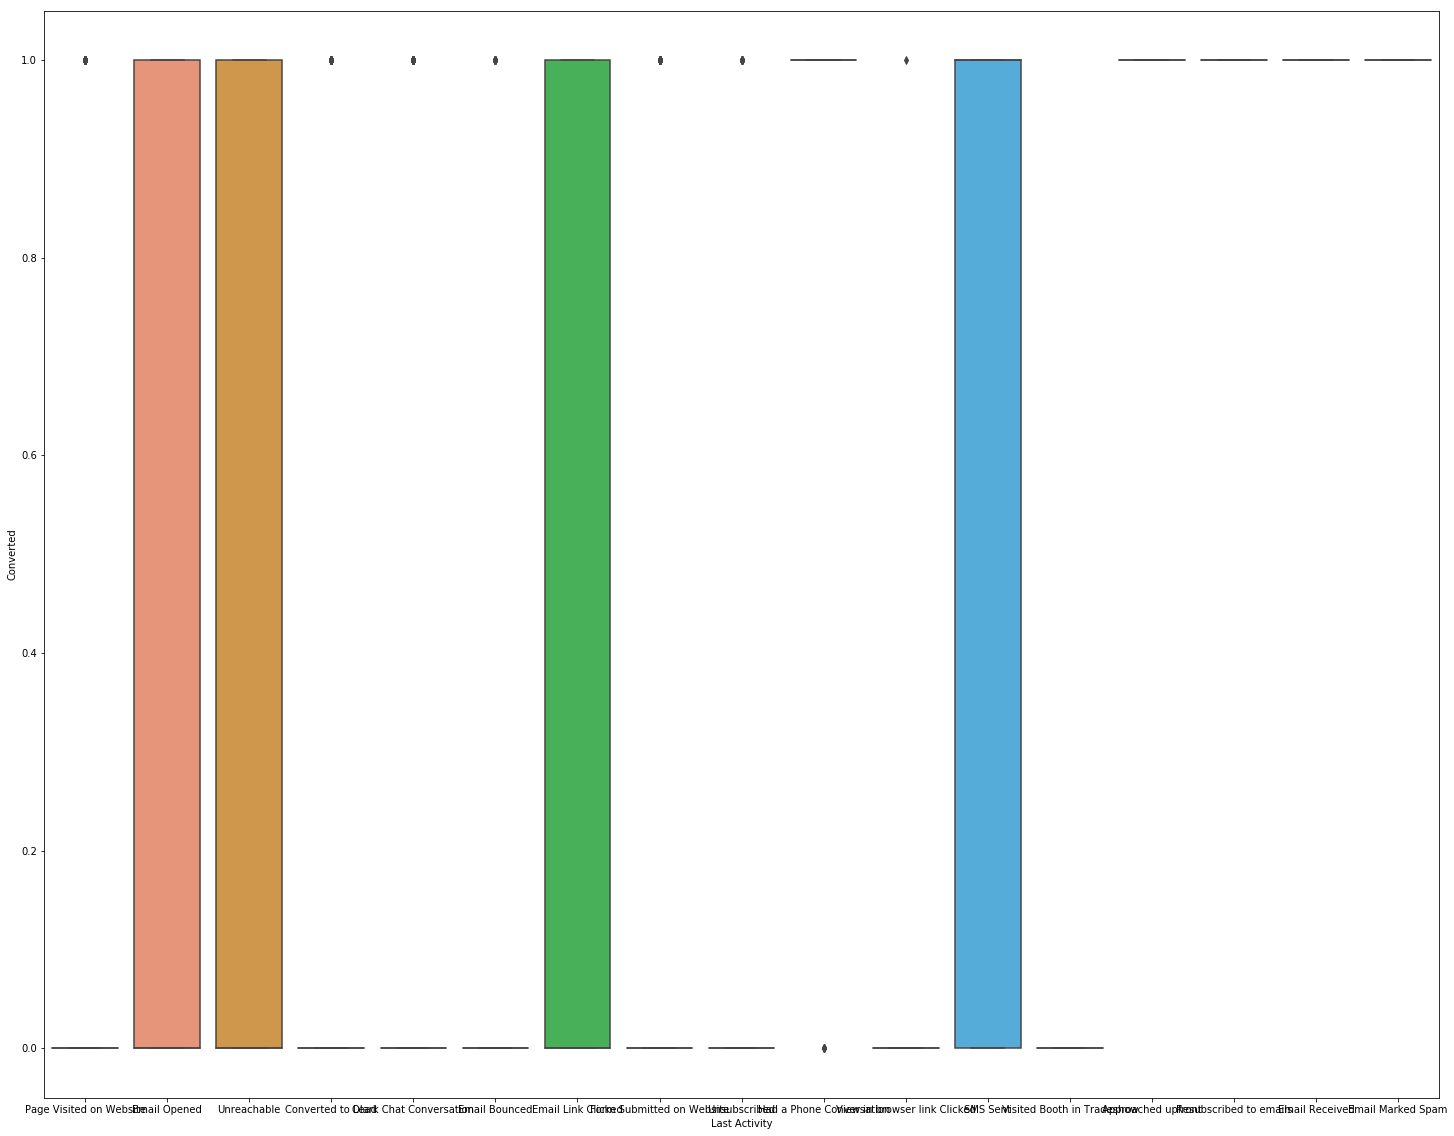

In [271]:
# Visualizing 'Last Activity'

plt.figure(figsize = (25, 20))
sns.boxplot(x = 'Last Activity', y = 'Converted', data = lead)
plt.show()

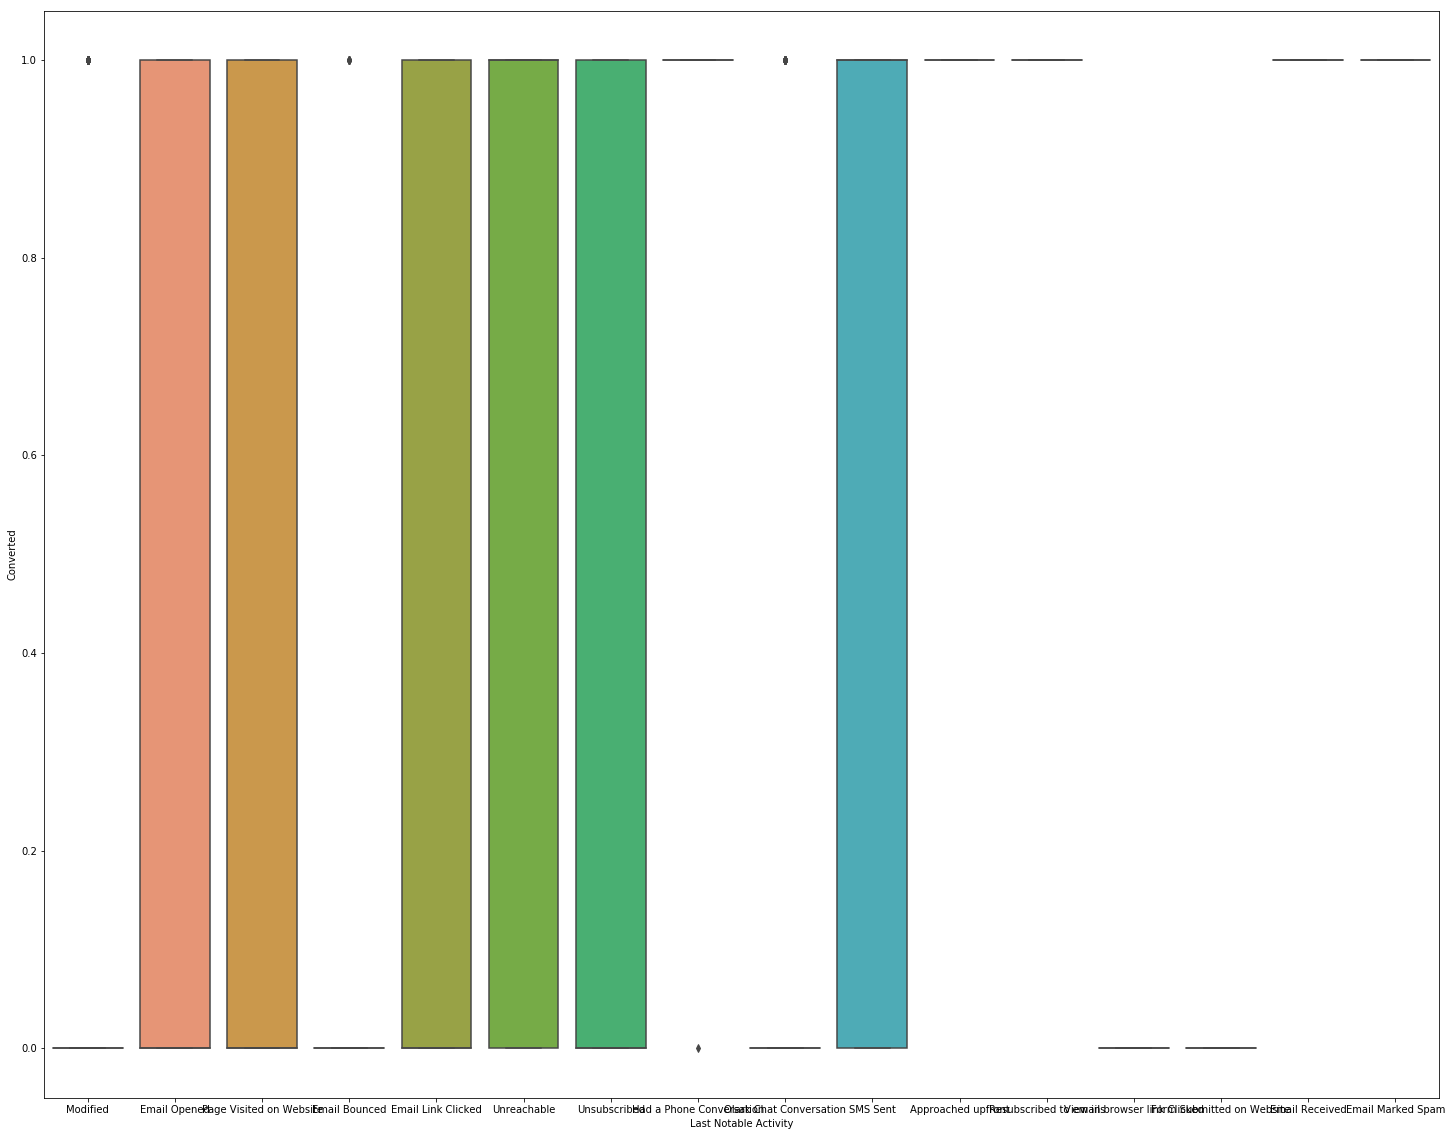

In [272]:
# Visualizing 'Last Notable Activity'

plt.figure(figsize = (25, 20))
sns.boxplot(x = 'Last Notable Activity', y = 'Converted', data = lead)
plt.show()

In [273]:
# Encoding:
## - Converitng binary categorical variables to 1 / 0
### - Other Categorical variables to dummy variables

In [274]:
# Converitng binary categorical variables to 1 / 0

lead['Do Not Email'] = lead['Do Not Email'].map({'No' : 0, 'Yes' : 1})
lead['Do Not Call'] = lead['Do Not Call'].map({'No' : 0, 'Yes' : 1})
lead['Search'] = lead['Search'].map({'No' : 0, 'Yes' : 1})
lead['Newspaper Article'] = lead['Newspaper Article'].map({'No' : 0, 'Yes' : 1})
lead['X Education Forums'] = lead['X Education Forums'].map({'No' : 0, 'Yes' : 1})
lead['Newspaper'] = lead['Newspaper'].map({'No' : 0, 'Yes' : 1})
lead['Digital Advertisement'] = lead['Digital Advertisement'].map({'No' : 0, 'Yes' : 1})
lead['Through Recommendations'] = lead['Through Recommendations'].map({'No' : 0, 'Yes' : 1})
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].map({'No' : 0, 'Yes' : 1})
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,3.0,246,2.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


In [275]:
# Converitng other Categorical variables to dummy variables and dropping redundants
# Lead Origin column

Origin = pd.get_dummies(lead['Lead Origin'], drop_first = True)
Origin.head()

,Landing Page Submission,Lead Add Form,Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [276]:
# Lead Source column

Source = pd.get_dummies(lead['Lead Source'], drop_first = True)
Source.head()

,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [277]:
# Last Activity column

Activity = pd.get_dummies(lead['Last Activity'], drop_first = True)
Activity.head()


,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [278]:
Activity.columns

Index(['Converted to Lead', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Email Received',
       'Form Submitted on Website', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked', 'Visited Booth in Tradeshow'],
      dtype='object')

In [279]:
# What is your current occupation column

Occupation = pd.get_dummies(lead['What is your current occupation'], drop_first = True)
Occupation.head()

,Housewife,Other,Student,Unemployed,Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [280]:
# What matters most to you in choosing a course column

Choosing = pd.get_dummies(lead['What matters most to you in choosing a course'], drop_first = True)
Choosing.head()

,Flexibility & Convenience,Other
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [281]:
# Last Notable Activity column

Notable = pd.get_dummies(lead['Last Notable Activity'], drop_first = True)
Notable.head()

,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [282]:
Notable.columns

Index(['Email Bounced', 'Email Link Clicked', 'Email Marked Spam',
       'Email Opened', 'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked'],
      dtype='object')

In [283]:
# The dataframes Activity and Notable have similar column names. We will rename them

Activity.columns = ['Converted to Lead', 'Email Bounced_A', 'Email Link Clicked_A',
       'Email Marked Spam_A', 'Email Opened_A', 'Email Received_A',
       'Form Submitted on Website_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'Page Visited on Website_A',
       'Resubscribed to emails_A', 'SMS Sent_A', 'Unreachable_A', 'Unsubscribed_A',
       'View in browser link Clicked_A', 'Visited Booth in Tradeshow']

Notable.columns = ['Email Bounced_N', 'Email Link Clicked_N', 'Email Marked Spam_N',
       'Email Opened_N', 'Email Received_N', 'Form Submitted on Website_N',
       'Had a Phone Conversation_N', 'Modified', 'Olark Chat Conversation_N',
       'Page Visited on Website_N', 'Resubscribed to emails_N', 'SMS Sent_N',
       'Unreachable_N', 'Unsubscribed_N', 'View in browser link Clicked_N']

In [284]:
Activity.columns

Index(['Converted to Lead', 'Email Bounced_A', 'Email Link Clicked_A',
       'Email Marked Spam_A', 'Email Opened_A', 'Email Received_A',
       'Form Submitted on Website_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'Page Visited on Website_A',
       'Resubscribed to emails_A', 'SMS Sent_A', 'Unreachable_A',
       'Unsubscribed_A', 'View in browser link Clicked_A',
       'Visited Booth in Tradeshow'],
      dtype='object')

In [285]:
Notable.columns

Index(['Email Bounced_N', 'Email Link Clicked_N', 'Email Marked Spam_N',
       'Email Opened_N', 'Email Received_N', 'Form Submitted on Website_N',
       'Had a Phone Conversation_N', 'Modified', 'Olark Chat Conversation_N',
       'Page Visited on Website_N', 'Resubscribed to emails_N', 'SMS Sent_N',
       'Unreachable_N', 'Unsubscribed_N', 'View in browser link Clicked_N'],
      dtype='object')

In [286]:
# Concating the additional columns

lead = pd.concat([lead, Origin, Source, Activity, Occupation, Choosing, Notable], axis = 1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Form Submitted on Website_N,Had a Phone Conversation_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N
0,660737,API,Olark Chat,0,0,0,3.0,246,2.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [287]:
# Dropping the original columns as they are redundant
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 
                  'What matters most to you in choosing a course', 'Last Notable Activity'], axis = 1)
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Form Submitted on Website_N,Had a Phone Conversation_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N
0,660737,0,0,0,3.0,246,2.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [288]:
# Model Building
## Splitting the data set into Train and Test data

X = lead.drop(['Lead Number', 'Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Form Submitted on Website_N,Had a Phone Conversation_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N
0,0,0,3.0,246,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [289]:
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [290]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)


In [291]:
# Scaling the features

scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Form Submitted on Website_N,Had a Phone Conversation_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N
3009,0,0,-0.451878,-0.291445,-0.504180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.451878,-0.704474,-0.504180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.451878,1.669945,-0.504180,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.168189,2.076988,-0.208842,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [292]:
# Checking the Converted rate

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

In [293]:
# We have 38% conversion rate

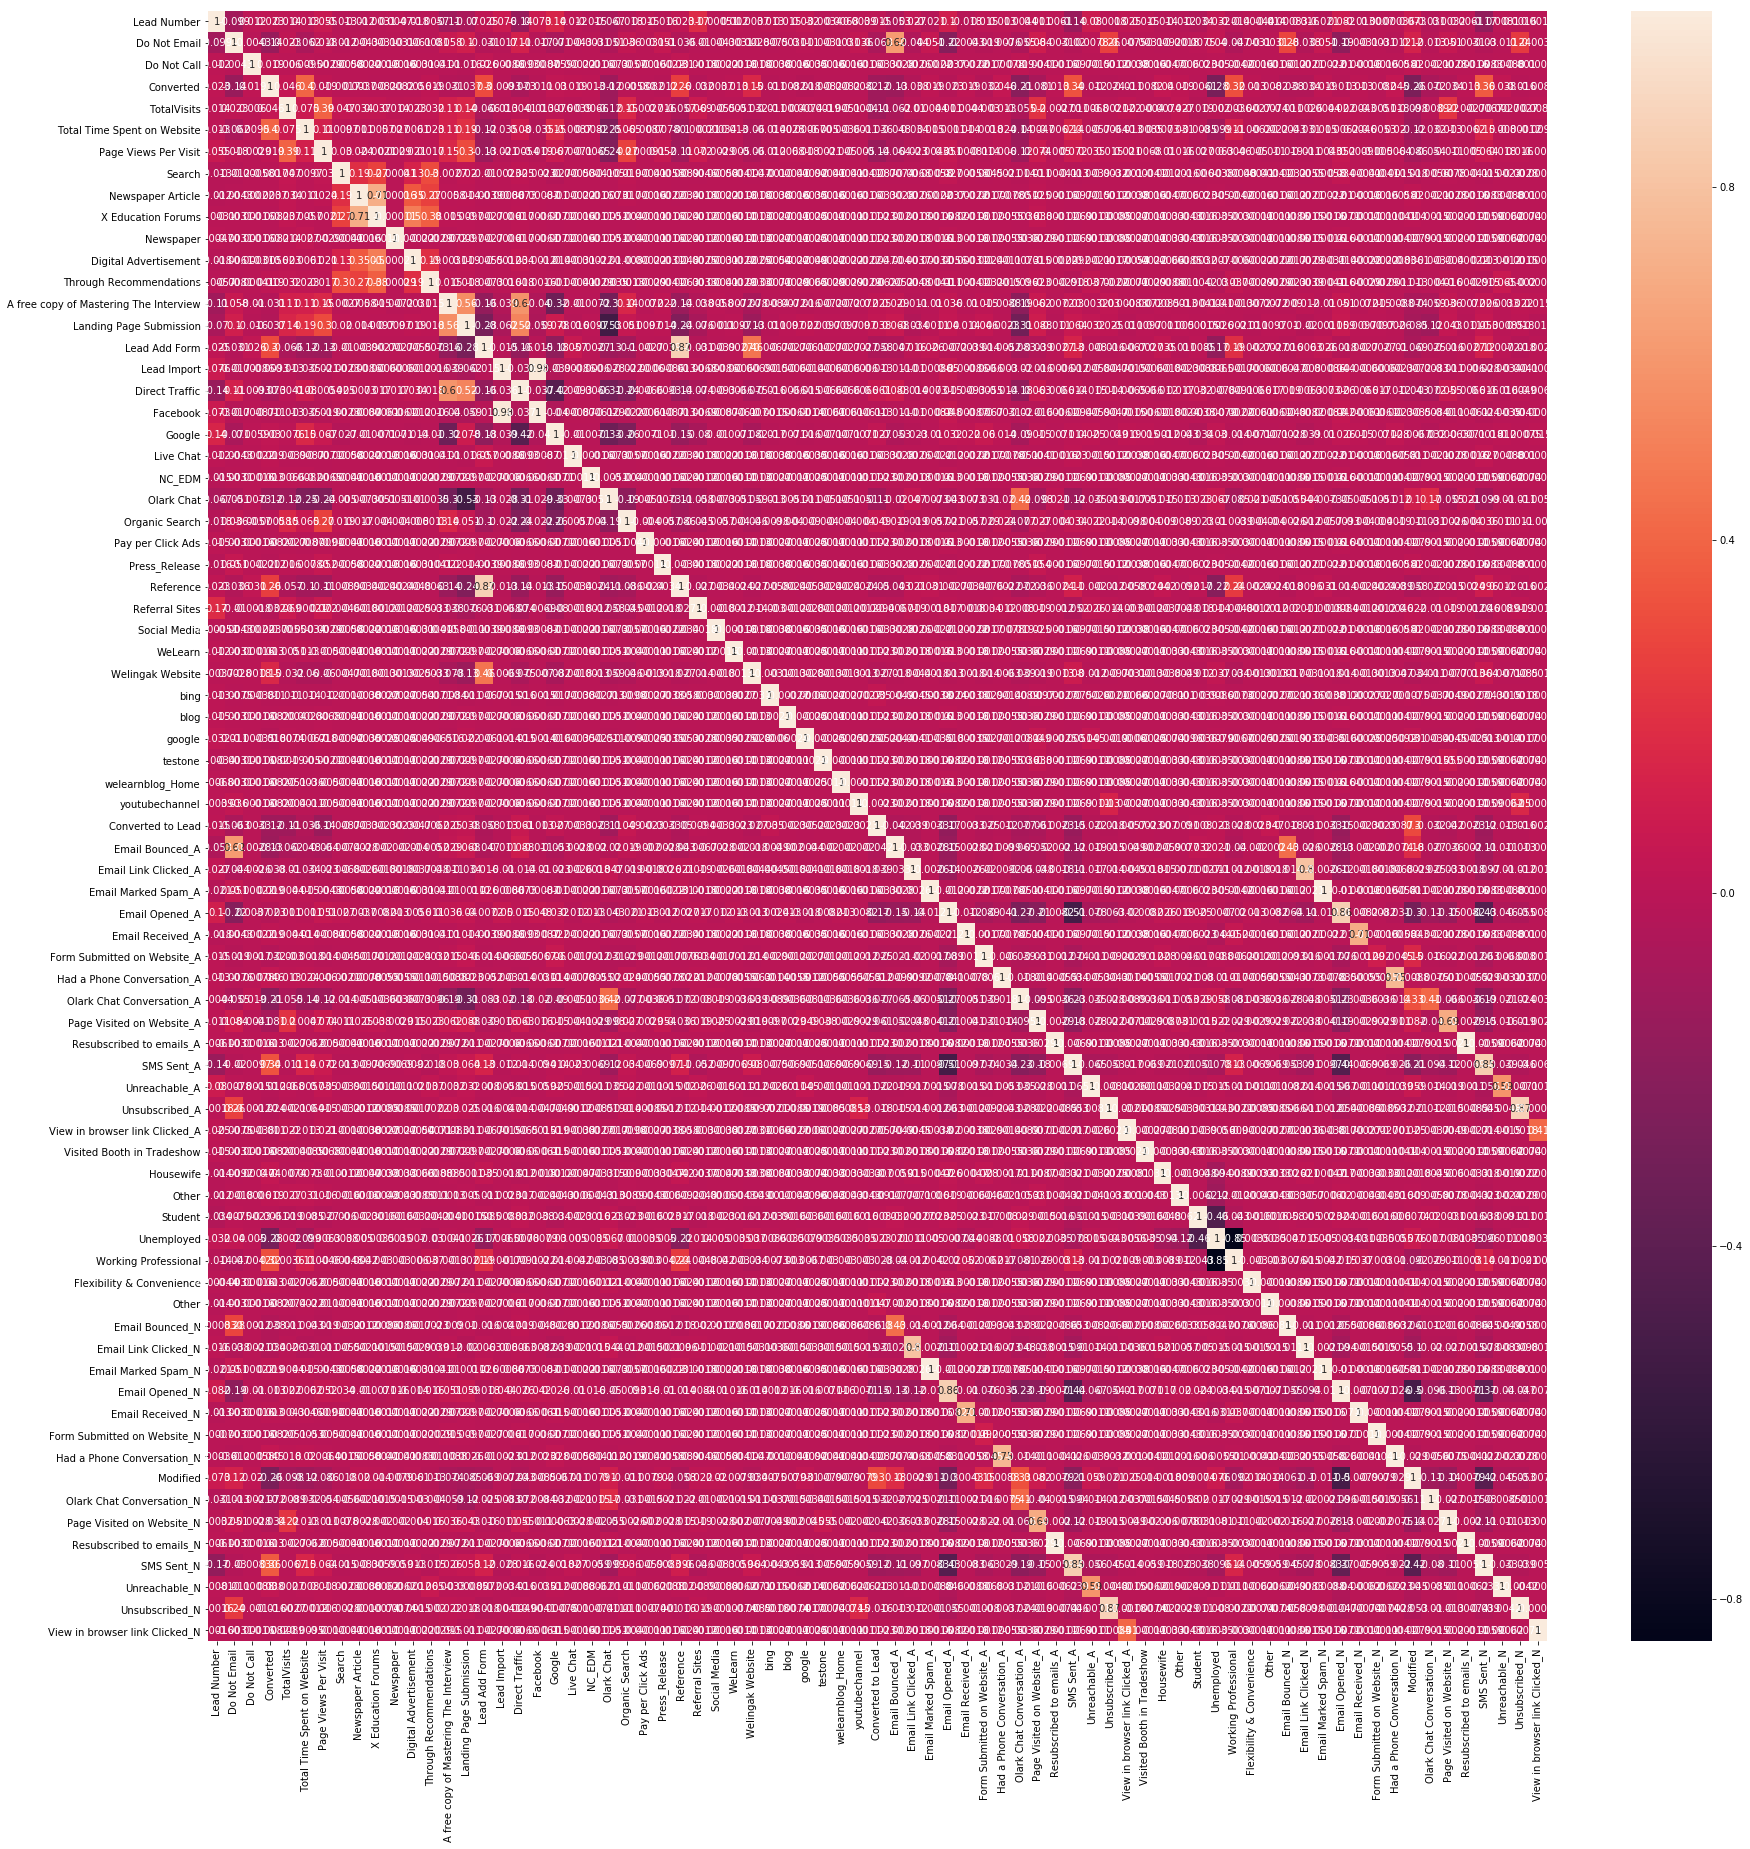

In [294]:
# Checking correlations
plt.figure(figsize = (30, 30))
sns.heatmap(lead.corr(),annot = True)
plt.show()

In [295]:
# It is almost impossible to find out which dummy variables are highly correlated using the above heatmap
# So, we will be proceeding with model building using all the features

In [296]:
# Running first logistic model

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        22:37:23   Pearson chi2:                 8.50e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    1.27e+15   9.51e+07   1.34e+07      0.000    1.27e+15    1.27e+15
Do Not Email                           -3.458e+14   4.42e+06  -7.81e+07      0.000   -3.46e+14   -3.46e+14
Do Not Call                             2.913e+15   4.76e+07   6.12e+07      0.000    2.91e+15    2.91e+15
TotalVisits                             6.714e+13   9.34e+05   7.19e+07      0.000    6.71e+13    6.71e+13
Total Time Spent on Website             7.124e+14    9.1e+05   7.83e+08      0.000    7.12e+14    7.12e+14
Page Views Per Visit                   -1.803e+13   1.02e+06  -1.77e+07      0.000    -1.8e+13    -1.8e+13
Search                                   3.94e+14   2.38e+07   1.66e+07      0.000    3.94e+14    3.94e+14
Newspaper Article                       4.113e+15   6.73e+07   6.11e+07      0.000    4.11e+15    4.11e+15
X Education Forums                     -9.309e+15   1.12e+08  -8.28e+07      0.000   -9.31e+15   -9.31e+15
Newspaper                              -7.225e+15   6.72e+07  -1.07e+08      0.000   -7.23e+15   -7.23e+15
Digital Advertisement                   1.615e+15   4.76e+07    3.4e+07      0.000    1.62e+15    1.62e+15
Through Recommendations                -1.527e+15   3.56e+07  -4.28e+07      0.000   -1.53e+15   -1.53e+15
A free copy of Mastering The Interview  3.684e+13   2.61e+06   1.41e+07      0.000    3.68e+13    3.68e+13
Landing Page Submission                 -4.69e+13   2.67e+06  -1.76e+07      0.000   -4.69e+13   -4.69e+13
Lead Add Form                           4.468e+14   4.76e+07   9.39e+06      0.000    4.47e+14    4.47e+14
Lead Import                             1.639e+15   6.88e+07   2.38e+07      0.000    1.64e+15    1.64e+15
Direct Traffic                           9.81e+14   6.15e+07    1.6e+07      0.000    9.81e+14    9.81e+14
Facebook                                -2.42e+15   9.12e+07  -2.65e+07      0.000   -2.42e+15   -2.42e+15
Google                                   1.31e+15   6.14e+07   2.13e+07      0.000    1.31e+15    1.31e+15
Live Chat                               6.997e+15   6.13e+07   1.14e+08      0.000       7e+15       7e+15
NC_EDM                                  4.634e+15    9.1e+07   5.09e+07      0.000    4.63e+15    4.63e+15
Olark Chat                             -4.922e+13   6.13e+07  -8.02e+05      0.000   -4.92e+13   -4.92e+13
Organic Search                          9.982e+14   6.15e+07   1.62e+07      0.000    9.98e+14    9.98e+14
Pay per Click Ads                      -4.524e+15    9.1e+07  -4.97e+07      0.000   -4.52e+15   -4.52e+15
Press_Release                          -8.359e+15   9.14e+07  -9.14e+07      0.000   -8.36e+15   -8.36e+15
Reference                               1.745e+15    3.9e+07   4.47e+07      0.000    1.74e+15    1.74e+15
Referral Sites                          8.977e+14   6.18e+0

In [297]:
# We can see some of the coefficients are in negative but the p-values of all features are 0 suggesting they are significant

In [298]:
# We will use RFE to scale down the features to 30 from 73

logreg = LogisticRegression()

In [299]:
rfe = RFE(logreg, 30)
rfe = rfe.fit(X_train, y_train)

In [300]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Search', False, 40),
 ('Newspaper Article', False, 10),
 ('X Education Forums', False, 18),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 33),
 ('Through Recommendations', False, 32),
 ('A free copy of Mastering The Interview', False, 37),
 ('Landing Page Submission', False, 17),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Direct Traffic', False, 7),
 ('Facebook', False, 34),
 ('Google', False, 26),
 ('Live Chat', False, 21),
 ('NC_EDM', True, 1),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 16),
 ('Pay per Click Ads', False, 29),
 ('Press_Release', False, 24),
 ('Reference', True, 1),
 ('Referral Sites', False, 9),
 ('Social Media', True, 1),
 ('WeLearn', False, 44),
 ('Welingak Website', True, 1),
 ('bing', False, 30),
 ('blog', False, 15),
 ('google', True, 1),
 ('testone', False, 2

In [301]:
# Taking only top 30 Features

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Lead Add Form', 'Lead Import', 'NC_EDM', 'Olark Chat',
       'Reference', 'Social Media', 'Welingak Website', 'google',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A',
       'Housewife', 'Student', 'Unemployed', 'Working Professional',
       'Email Link Clicked_N', 'Email Opened_N', 'Had a Phone Conversation_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Resubscribed to emails_N', 'Unreachable_N'],
      dtype='object')

In [302]:
# Columns which are not useful

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Direct Traffic', 'Facebook', 'Google',
       'Live Chat', 'Organic Search', 'Pay per Click Ads', 'Press_Release',
       'Referral Sites', 'WeLearn', 'bing', 'blog', 'testone',
       'welearnblog_Home', 'youtubechannel', 'Email Link Clicked_A',
       'Email Marked Spam_A', 'Email Opened_A', 'Email Received_A',
       'Form Submitted on Website_A', 'Page Visited on Website_A',
       'Resubscribed to emails_A', 'Unreachable_A',
       'View in browser link Clicked_A', 'Visited Booth in Tradeshow', 'Other',
       'Flexibility & Convenience', 'Other', 'Email Bounced_N',
       'Email Marked Spam_N', 'Email Received_N',
       'Form Submitted on Website_N', 'SMS Sent_N', 'Unsubscribed_N',
       'View in browser link Clicked_N'],
      dtype='objec

In [303]:
# Building model using Statsmodel for detailed statistics

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.8
Date:                Mon, 26 Aug 2019   Deviance:                       5211.5
Time:                        22:37:25   Pearson chi2:                 6.42e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0134      0.626      1.619      0.105      -0.213       2.240
Do Not Email                   -1.6349      0.216     -7.556      0.000      -2.059      -1.211
Do Not Call                    23.3976   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Total Time Spent on Website     1.0654      0.038     28.087      0.000       0.991       1.140
Newspaper                     -25.1322   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Add Form                   1.8383      0.913      2.013      0.044       0.048       3.628
Lead Import                     1.0504      0.456      2.303      0.021       0.157       1.944
NC_EDM                         23.8727   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Olark Chat                      0.8054      0.098      8.248      0.000       0.614       0.997
Reference                       1.6117      0.939      1.717      0.086      -0.228       3.452
Social Media                    2.2149      1.427      1.553      0.121      -0.581       5.011
Welingak Website                3.6396      1.165      3.124      0.002       1.356       5.923
google                        -22.1715   3.54e+04     -0.001      1.000   -6.95e+04    6.94e+04
Converted to Lead              -0.9429      0.236     -3.998      0.000      -1.405      -0.481
Email Bounced_A                -0.9100      0.442     -2.058      0.040      -1.777      -0.043
Had a Phone Conversation_A      1.9620      1.165      1.684      0.092      -0.322       4.246
Olark Chat Conversation_A      -1.2173      0.201     -6.071      0.000      -1.610      -0.824
SMS Sent_A                      0.5188      0.159      3.271      0.001       0.208       0.830
Unsubscribed_A                  0.5853      0.516      1.134      0.257      -0.426       1.597
Housewife                      22.6447   2.61e+04      0.001      0.999    -5.1e+04    5.11e+04
Student                        -0.8301      0.646     -1.286      0.198      -2.095       0.435
Unemployed                     -1.2442      0.607     -2.051      0.040      -2.433      -0.055
Working Professional            1.5413      0.633      2.434      0.015       0.300       2.782
Email Link Clicked_N           -1.3763      0.300     -4.592      0.000      -1.964      -0.789
Email Opened_N                 -0.9006      0.180     -5.009      0.000      -1.253      -0.548
Had a Phone Conversation_N      0.6278      1.603      0.392      0.695      -2.513       3.769
Modified                       -1.3966      0.143     -9.760      0.000      -1.677      -1.116
Olark Chat Conversation_N      -1.0816      0.378     -2.860      0.004      -1.823      -0.340
Page Visited on Website_N      -1.1458      0.256     -4.473      0.000      -1.648      -0.644
Resubscribed to emails_N       23.6230   7.95e+04      0.000      1.000   -1.56e+05    1.5

In [304]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.191261
1012    0.322863
9226    0.281975
4750    0.887673
7987    0.751051
1281    0.773009
2880    0.093023
4971    0.914437
7536    0.872030
1248    0.714896
dtype: float64

In [305]:
# Creating a data frame with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
3009,0,0.191261,3009
1012,0,0.322863,1012
9226,0,0.281975,9226
4750,1,0.887673,4750
7987,1,0.751051,7987


In [306]:
# Creating a new column 'predicted' with values 0 or 1 if Converted_Prob > 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
3009,0,0.191261,3009,0
1012,0,0.322863,1012,0
9226,0,0.281975,9226,0
4750,1,0.887673,4750,1
7987,1,0.751051,7987,1


In [307]:
# Confusion Metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3468  437]
 [ 723 1723]]


In [308]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.817351598173516


In [309]:
# Checking for VIF's

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Add Form,62.44
8,Reference,48.09
20,Unemployed,21.32
10,Welingak Website,15.47
23,Email Opened_N,8.04
16,SMS Sent_A,6.30
25,Modified,5.93
24,Had a Phone Conversation_N,3.43
14,Had a Phone Conversation_A,3.42
21,Working Professional,2.75


In [310]:
# Dropping 'Lead Add Form' column as it has high VIF

col = col.drop('Lead Add Form', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Lead Import', 'NC_EDM', 'Olark Chat', 'Reference',
       'Social Media', 'Welingak Website', 'google', 'Converted to Lead',
       'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A',
       'Housewife', 'Student', 'Unemployed', 'Working Professional',
       'Email Link Clicked_N', 'Email Opened_N', 'Had a Phone Conversation_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Resubscribed to emails_N', 'Unreachable_N'],
      dtype='object')

In [311]:
# Creating 3rd model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.0
Date:                Mon, 26 Aug 2019   Deviance:                       5216.0
Time:                        22:37:27   Pearson chi2:                 6.42e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0178      0.625      1.627      0.104      -0.208       2.244
Do Not Email                   -1.6383      0.216     -7.575      0.000      -2.062      -1.214
Do Not Call                    23.3977   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Total Time Spent on Website     1.0642      0.038     28.085      0.000       0.990       1.139
Newspaper                     -25.1324   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Import                     1.0468      0.456      2.295      0.022       0.153       1.941
NC_EDM                         23.8705   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Olark Chat                      0.8057      0.098      8.261      0.000       0.615       0.997
Reference                       3.4465      0.226     15.278      0.000       3.004       3.889
Social Media                    2.2125      1.426      1.551      0.121      -0.583       5.008
Welingak Website                5.4747      0.725      7.546      0.000       4.053       6.897
google                        -22.1747   3.54e+04     -0.001      1.000   -6.94e+04    6.94e+04
Converted to Lead              -0.9467      0.236     -4.016      0.000      -1.409      -0.485
Email Bounced_A                -0.9123      0.442     -2.063      0.039      -1.779      -0.046
Had a Phone Conversation_A      1.9577      1.165      1.680      0.093      -0.326       4.242
Olark Chat Conversation_A      -1.2222      0.200     -6.099      0.000      -1.615      -0.829
SMS Sent_A                      0.5148      0.159      3.247      0.001       0.204       0.826
Unsubscribed_A                  0.5815      0.516      1.127      0.260      -0.430       1.593
Housewife                      22.6450   2.61e+04      0.001      0.999    -5.1e+04    5.11e+04
Student                        -0.8299      0.645     -1.286      0.198      -2.095       0.435
Unemployed                     -1.2408      0.606     -2.047      0.041      -2.429      -0.053
Working Professional            1.5414      0.633      2.436      0.015       0.301       2.782
Email Link Clicked_N           -1.3837      0.300     -4.618      0.000      -1.971      -0.796
Email Opened_N                 -0.9053      0.180     -5.038      0.000      -1.257      -0.553
Had a Phone Conversation_N      0.6237      1.603      0.389      0.697      -2.517       3.765
Modified                       -1.3995      0.143     -9.784      0.000      -1.680      -1.119
Olark Chat Conversation_N      -1.0840      0.378     -2.867      0.004      -1.825      -0.343
Page Visited on Website_N      -1.1375      0.256     -4.451      0.000      -1.638      -0.637
Resubscribed to emails_N       23.6141   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Unreachable_N                   0.7462      0.503      1.483      0.138      -0.240       

In [312]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

In [313]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred

In [314]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
3009,0,0.191798,3009,0
1012,0,0.322765,1012,0
9226,0,0.282355,9226,0
4750,1,0.887862,4750,1
7987,1,0.750772,7987,1


In [315]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8164068650606203


In [316]:
# Overall accuracy has not dropped much

In [317]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Unemployed,21.31
22,Email Opened_N,8.04
15,SMS Sent_A,6.30
24,Modified,5.93
23,Had a Phone Conversation_N,3.43
13,Had a Phone Conversation_A,3.42
20,Working Professional,2.75
14,Olark Chat Conversation_A,2.24
0,Do Not Email,2.08
12,Email Bounced_A,2.04


In [318]:
# We will drop 'Do Not Call' as it has high p-value

col = col.drop('Do Not Call', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Lead Import', 'NC_EDM', 'Olark Chat', 'Reference', 'Social Media',
       'Welingak Website', 'google', 'Converted to Lead', 'Email Bounced_A',
       'Had a Phone Conversation_A', 'Olark Chat Conversation_A', 'SMS Sent_A',
       'Unsubscribed_A', 'Housewife', 'Student', 'Unemployed',
       'Working Professional', 'Email Link Clicked_N', 'Email Opened_N',
       'Had a Phone Conversation_N', 'Modified', 'Olark Chat Conversation_N',
       'Page Visited on Website_N', 'Resubscribed to emails_N',
       'Unreachable_N'],
      dtype='object')

In [319]:
# Creating 4th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.2
Date:                Mon, 26 Aug 2019   Deviance:                       5218.5
Time:                        22:37:28   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0185      0.626      1.628      0.103      -0.207       2.244
Do Not Email                   -1.6403      0.216     -7.579      0.000      -2.065      -1.216
Total Time Spent on Website     1.0649      0.038     28.109      0.000       0.991       1.139
Newspaper                     -24.1339   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Import                     1.0472      0.456      2.297      0.022       0.153       1.941
NC_EDM                         22.8702   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Olark Chat                      0.8037      0.097      8.244      0.000       0.613       0.995
Reference                       3.4706      0.226     15.354      0.000       3.028       3.914
Social Media                    2.2030      1.427      1.544      0.123      -0.594       5.000
Welingak Website                5.4752      0.725      7.547      0.000       4.053       6.897
google                        -21.1773   2.15e+04     -0.001      0.999   -4.21e+04    4.21e+04
Converted to Lead              -0.9499      0.236     -4.030      0.000      -1.412      -0.488
Email Bounced_A                -0.9133      0.442     -2.066      0.039      -1.780      -0.047
Had a Phone Conversation_A      1.9549      1.166      1.677      0.094      -0.330       4.239
Olark Chat Conversation_A      -1.2092      0.199     -6.078      0.000      -1.599      -0.819
SMS Sent_A                      0.5111      0.159      3.224      0.001       0.200       0.822
Unsubscribed_A                  0.5800      0.516      1.124      0.261      -0.431       1.591
Housewife                      21.6453   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
Student                        -0.8284      0.645     -1.284      0.199      -2.093       0.436
Unemployed                     -1.2377      0.606     -2.042      0.041      -2.426      -0.050
Working Professional            1.5430      0.633      2.438      0.015       0.303       2.783
Email Link Clicked_N           -1.3878      0.300     -4.630      0.000      -1.975      -0.800
Email Opened_N                 -0.9092      0.180     -5.059      0.000      -1.261      -0.557
Had a Phone Conversation_N      0.6231      1.603      0.389      0.697      -2.518       3.765
Modified                       -1.4003      0.143     -9.784      0.000      -1.681      -1.120
Olark Chat Conversation_N      -1.0997      0.378     -2.913      0.004      -1.840      -0.360
Page Visited on Website_N      -1.1412      0.256     -4.465      0.000      -1.642      -0.640
Resubscribed to emails_N       22.6128   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Unreachable_N                   0.7427      0.503      1.476      0.140      -0.243       1.729
==========================================================================================

In [320]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

In [321]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred

In [322]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
3009,0,0.191729,3009,0
1012,0,0.322490,1012,0
9226,0,0.281722,9226,0
4750,1,0.887976,4750,1
7987,1,0.750890,7987,1


In [323]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8164068650606203


In [324]:
# Overall accuracy has not dropped 

In [325]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Unemployed,21.30
21,Email Opened_N,8.04
14,SMS Sent_A,6.30
23,Modified,5.93
22,Had a Phone Conversation_N,3.43
12,Had a Phone Conversation_A,3.42
19,Working Professional,2.75
13,Olark Chat Conversation_A,2.24
0,Do Not Email,2.08
11,Email Bounced_A,2.04


In [326]:
# Removing 'Newspaper' as it has high p-value

col = col.drop('Newspaper', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import', 'NC_EDM',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website', 'google',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A',
       'Housewife', 'Student', 'Unemployed', 'Working Professional',
       'Email Link Clicked_N', 'Email Opened_N', 'Had a Phone Conversation_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Resubscribed to emails_N', 'Unreachable_N'],
      dtype='object')

In [327]:
# Creating 5th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.0
Date:                Mon, 26 Aug 2019   Deviance:                       5222.0
Time:                        22:37:29   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0205      0.625      1.632      0.103      -0.205       2.246
Do Not Email                   -1.6396      0.216     -7.579      0.000      -2.064      -1.216
Total Time Spent on Website     1.0623      0.038     28.079      0.000       0.988       1.136
Lead Import                     1.0470      0.456      2.296      0.022       0.153       1.941
NC_EDM                         22.8744   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Olark Chat                      0.8029      0.097      8.237      0.000       0.612       0.994
Reference                       3.4696      0.226     15.351      0.000       3.027       3.913
Social Media                    2.2025      1.427      1.544      0.123      -0.594       4.999
Welingak Website                5.4740      0.725      7.545      0.000       4.052       6.896
google                        -21.1767   2.15e+04     -0.001      0.999   -4.21e+04    4.21e+04
Converted to Lead              -0.9492      0.236     -4.029      0.000      -1.411      -0.487
Email Bounced_A                -0.9136      0.442     -2.067      0.039      -1.780      -0.047
Had a Phone Conversation_A      1.9544      1.165      1.678      0.093      -0.329       4.238
Olark Chat Conversation_A      -1.2099      0.199     -6.083      0.000      -1.600      -0.820
SMS Sent_A                      0.5108      0.158      3.223      0.001       0.200       0.821
Unsubscribed_A                  0.5798      0.516      1.124      0.261      -0.431       1.591
Housewife                      21.6445   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
Student                        -0.8286      0.645     -1.285      0.199      -2.093       0.435
Unemployed                     -1.2393      0.606     -2.045      0.041      -2.427      -0.052
Working Professional            1.5417      0.633      2.437      0.015       0.302       2.781
Email Link Clicked_N           -1.3877      0.300     -4.631      0.000      -1.975      -0.800
Email Opened_N                 -0.9119      0.180     -5.076      0.000      -1.264      -0.560
Had a Phone Conversation_N      0.6219      1.602      0.388      0.698      -2.518       3.762
Modified                       -1.3998      0.143     -9.785      0.000      -1.680      -1.119
Olark Chat Conversation_N      -1.0982      0.377     -2.910      0.004      -1.838      -0.359
Page Visited on Website_N      -1.1406      0.255     -4.465      0.000      -1.641      -0.640
Resubscribed to emails_N       22.6117   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Unreachable_N                   0.7417      0.503      1.475      0.140      -0.244       1.727
===============================================================================================
"""

In [328]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

In [329]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred

In [330]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted
3009,0,0.191499,3009,0
1012,0,0.323122,1012,0
9226,0,0.281995,9226,0
4750,1,0.887557,4750,1
7987,1,0.750012,7987,1


In [331]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8162494095418045


In [332]:
# Overall accuracy has not dropped

In [333]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Unemployed,21.30
20,Email Opened_N,8.04
13,SMS Sent_A,6.30
22,Modified,5.93
21,Had a Phone Conversation_N,3.43
11,Had a Phone Conversation_A,3.42
18,Working Professional,2.75
12,Olark Chat Conversation_A,2.24
0,Do Not Email,2.08
10,Email Bounced_A,2.04


In [334]:
# Removing 'NC_EDM' as it has high p-value

col = col.drop('NC_EDM', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website', 'google',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A',
       'Housewife', 'Student', 'Unemployed', 'Working Professional',
       'Email Link Clicked_N', 'Email Opened_N', 'Had a Phone Conversation_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Resubscribed to emails_N', 'Unreachable_N'],
      dtype='object')

In [335]:
# Creating 6th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.9
Date:                Mon, 26 Aug 2019   Deviance:                       5223.7
Time:                        22:37:30   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0197      0.625      1.631      0.103      -0.206       2.245
Do Not Email                   -1.6397      0.216     -7.579      0.000      -2.064      -1.216
Total Time Spent on Website     1.0627      0.038     28.086      0.000       0.989       1.137
Lead Import                     1.0457      0.456      2.293      0.022       0.152       1.939
Olark Chat                      0.8022      0.097      8.230      0.000       0.611       0.993
Reference                       3.4690      0.226     15.348      0.000       3.026       3.912
Social Media                    2.2022      1.427      1.543      0.123      -0.594       4.999
Welingak Website                5.4734      0.725      7.545      0.000       4.052       6.895
google                        -21.1770   2.15e+04     -0.001      0.999   -4.21e+04    4.21e+04
Converted to Lead              -0.9494      0.236     -4.030      0.000      -1.411      -0.488
Email Bounced_A                -0.9135      0.442     -2.066      0.039      -1.780      -0.047
Had a Phone Conversation_A      1.9543      1.165      1.677      0.093      -0.329       4.238
Olark Chat Conversation_A      -1.2094      0.199     -6.081      0.000      -1.599      -0.820
SMS Sent_A                      0.5108      0.158      3.223      0.001       0.200       0.821
Unsubscribed_A                  0.5798      0.516      1.124      0.261      -0.431       1.591
Housewife                      21.6438   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
Student                        -0.8287      0.645     -1.285      0.199      -2.093       0.435
Unemployed                     -1.2383      0.606     -2.044      0.041      -2.426      -0.051
Working Professional            1.5419      0.633      2.437      0.015       0.302       2.782
Email Link Clicked_N           -1.3875      0.300     -4.631      0.000      -1.975      -0.800
Email Opened_N                 -0.9099      0.180     -5.065      0.000      -1.262      -0.558
Had a Phone Conversation_N      0.6221      1.602      0.388      0.698      -2.518       3.763
Modified                       -1.3998      0.143     -9.785      0.000      -1.680      -1.119
Olark Chat Conversation_N      -1.0984      0.377     -2.911      0.004      -1.838      -0.359
Page Visited on Website_N      -1.1408      0.255     -4.466      0.000      -1.641      -0.640
Resubscribed to emails_N       22.6124   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Unreachable_N                   0.7417      0.503      1.475      0.140      -0.244       1.727
===============================================================================================
"""

In [336]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [337]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [338]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.191808,3009,0
1012,0,0.322951,1012,0
9226,0,0.281829,9226,0
4750,1,0.887630,4750,1
7987,1,0.750160,7987,1


In [339]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8160919540229885


In [340]:
# Overall accuracy has not dropped

In [341]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
16,Unemployed,21.30
19,Email Opened_N,8.04
12,SMS Sent_A,6.30
21,Modified,5.93
20,Had a Phone Conversation_N,3.43
10,Had a Phone Conversation_A,3.42
17,Working Professional,2.75
11,Olark Chat Conversation_A,2.24
0,Do Not Email,2.08
9,Email Bounced_A,2.04


In [342]:
# Removing 'Resubscribed to emails_N' as it has high p-value

col = col.drop('Resubscribed to emails_N', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website', 'google',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A',
       'Housewife', 'Student', 'Unemployed', 'Working Professional',
       'Email Link Clicked_N', 'Email Opened_N', 'Had a Phone Conversation_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Unreachable_N'],
      dtype='object')

In [343]:
# Creating 7th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.6
Date:                Mon, 26 Aug 2019   Deviance:                       5225.1
Time:                        22:37:32   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0328      0.625      1.652      0.098      -0.192       2.258
Do Not Email                   -1.6406      0.216     -7.581      0.000      -2.065      -1.216
Total Time Spent on Website     1.0627      0.038     28.084      0.000       0.989       1.137
Lead Import                     1.0469      0.456      2.296      0.022       0.153       1.941
Olark Chat                      0.8056      0.097      8.271      0.000       0.615       0.996
Reference                       3.4693      0.226     15.349      0.000       3.026       3.912
Social Media                    2.2013      1.427      1.543      0.123      -0.595       4.997
Welingak Website                5.4747      0.726      7.546      0.000       4.053       6.897
google                        -21.1795   2.15e+04     -0.001      0.999   -4.21e+04    4.21e+04
Converted to Lead              -0.9533      0.236     -4.047      0.000      -1.415      -0.492
Email Bounced_A                -0.9223      0.442     -2.086      0.037      -1.789      -0.056
Had a Phone Conversation_A      1.9504      1.165      1.674      0.094      -0.333       4.234
Olark Chat Conversation_A      -1.2155      0.199     -6.115      0.000      -1.605      -0.826
SMS Sent_A                      0.4983      0.158      3.153      0.002       0.189       0.808
Unsubscribed_A                  0.5674      0.516      1.100      0.271      -0.443       1.578
Housewife                      21.6452   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
Student                        -0.8286      0.645     -1.285      0.199      -2.093       0.435
Unemployed                     -1.2374      0.606     -2.042      0.041      -2.425      -0.050
Working Professional            1.5423      0.633      2.438      0.015       0.303       2.782
Email Link Clicked_N           -1.4027      0.299     -4.687      0.000      -1.989      -0.816
Email Opened_N                 -0.9246      0.179     -5.162      0.000      -1.276      -0.574
Had a Phone Conversation_N      0.6118      1.602      0.382      0.703      -2.529       3.752
Modified                       -1.4100      0.143     -9.871      0.000      -1.690      -1.130
Olark Chat Conversation_N      -1.1086      0.377     -2.938      0.003      -1.848      -0.369
Page Visited on Website_N      -1.1551      0.255     -4.528      0.000      -1.655      -0.655
Unreachable_N                   0.7273      0.503      1.447      0.148      -0.258       1.713
===============================================================================================
"""

In [344]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [345]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [346]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.191708,3009,0
1012,0,0.323801,1012,0
9226,0,0.280780,9226,0
4750,1,0.887785,4750,1
7987,1,0.748547,7987,1


In [347]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8159344985041725


In [348]:
# Overall accuracy has not dropped

In [349]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
16,Unemployed,21.23
19,Email Opened_N,8.01
12,SMS Sent_A,6.28
21,Modified,5.91
20,Had a Phone Conversation_N,3.43
10,Had a Phone Conversation_A,3.42
17,Working Professional,2.74
11,Olark Chat Conversation_A,2.24
0,Do Not Email,2.08
9,Email Bounced_A,2.04


In [350]:
# Removing 'google' as it has high p-value

col = col.drop('google', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A',
       'Housewife', 'Student', 'Unemployed', 'Working Professional',
       'Email Link Clicked_N', 'Email Opened_N', 'Had a Phone Conversation_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Unreachable_N'],
      dtype='object')

In [351]:
# Creating 8th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.6
Date:                Mon, 26 Aug 2019   Deviance:                       5227.2
Time:                        22:37:33   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0295      0.625      1.647      0.100      -0.196       2.255
Do Not Email                   -1.6412      0.216     -7.587      0.000      -2.065      -1.217
Total Time Spent on Website     1.0624      0.038     28.080      0.000       0.988       1.137
Lead Import                     1.0478      0.456      2.298      0.022       0.154       1.942
Olark Chat                      0.8065      0.097      8.279      0.000       0.616       0.997
Reference                       3.4709      0.226     15.355      0.000       3.028       3.914
Social Media                    2.2053      1.427      1.546      0.122      -0.591       5.002
Welingak Website                5.4760      0.726      7.548      0.000       4.054       6.898
Converted to Lead              -0.9460      0.236     -4.017      0.000      -1.408      -0.484
Email Bounced_A                -0.9151      0.442     -2.070      0.038      -1.782      -0.048
Had a Phone Conversation_A      1.9578      1.165      1.680      0.093      -0.326       4.241
Olark Chat Conversation_A      -1.2090      0.199     -6.084      0.000      -1.599      -0.820
SMS Sent_A                      0.5047      0.158      3.195      0.001       0.195       0.814
Unsubscribed_A                  0.5745      0.516      1.114      0.265      -0.436       1.585
Housewife                      21.6422   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
Student                        -0.8310      0.645     -1.288      0.198      -2.095       0.433
Unemployed                     -1.2407      0.606     -2.048      0.041      -2.428      -0.053
Working Professional            1.5404      0.633      2.435      0.015       0.301       2.780
Email Link Clicked_N           -1.3966      0.299     -4.667      0.000      -1.983      -0.810
Email Opened_N                 -0.9184      0.179     -5.130      0.000      -1.269      -0.568
Had a Phone Conversation_N      0.6108      1.602      0.381      0.703      -2.530       3.751
Modified                       -1.4107      0.143     -9.878      0.000      -1.691      -1.131
Olark Chat Conversation_N      -1.1091      0.377     -2.940      0.003      -1.849      -0.370
Page Visited on Website_N      -1.1486      0.255     -4.503      0.000      -1.649      -0.649
Unreachable_N                   0.7336      0.503      1.459      0.145      -0.252       1.719
===============================================================================================
"""

In [352]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [353]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [354]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.191675,3009,0
1012,0,0.324144,1012,0
9226,0,0.280824,9226,0
4750,1,0.887721,4750,1
7987,1,0.748269,7987,1


In [355]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8157770429853566


In [356]:
# Overall accuracy has not dropped

In [357]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
15,Unemployed,21.23
18,Email Opened_N,8.01
11,SMS Sent_A,6.28
20,Modified,5.91
19,Had a Phone Conversation_N,3.43
9,Had a Phone Conversation_A,3.42
16,Working Professional,2.74
10,Olark Chat Conversation_A,2.23
0,Do Not Email,2.08
8,Email Bounced_A,2.03


In [358]:
# Removing 'Housewife' as it has high p-value

col = col.drop('Housewife', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A', 'Student',
       'Unemployed', 'Working Professional', 'Email Link Clicked_N',
       'Email Opened_N', 'Had a Phone Conversation_N', 'Modified',
       'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Unreachable_N'],
      dtype='object')

In [359]:
# Creating 9th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.4
Date:                Mon, 26 Aug 2019   Deviance:                       5230.8
Time:                        22:37:34   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.4666      0.577      2.542      0.011       0.336       2.597
Do Not Email                   -1.6451      0.217     -7.595      0.000      -2.070      -1.221
Total Time Spent on Website     1.0613      0.038     28.074      0.000       0.987       1.135
Lead Import                     1.0459      0.456      2.293      0.022       0.152       1.940
Olark Chat                      0.8050      0.097      8.264      0.000       0.614       0.996
Reference                       3.4765      0.226     15.389      0.000       3.034       3.919
Social Media                    2.2080      1.427      1.548      0.122      -0.588       5.004
Welingak Website                5.4757      0.726      7.547      0.000       4.054       6.898
Converted to Lead              -0.9421      0.235     -4.001      0.000      -1.404      -0.481
Email Bounced_A                -0.9079      0.442     -2.053      0.040      -1.775      -0.041
Had a Phone Conversation_A      1.9617      1.165      1.684      0.092      -0.322       4.245
Olark Chat Conversation_A      -1.2080      0.199     -6.074      0.000      -1.598      -0.818
SMS Sent_A                      0.5073      0.158      3.210      0.001       0.198       0.817
Unsubscribed_A                  0.5811      0.516      1.127      0.260      -0.430       1.592
Student                        -1.2708      0.598     -2.125      0.034      -2.443      -0.098
Unemployed                     -1.6799      0.556     -3.022      0.003      -2.770      -0.590
Working Professional            1.1008      0.585      1.883      0.060      -0.045       2.247
Email Link Clicked_N           -1.3909      0.299     -4.654      0.000      -1.977      -0.805
Email Opened_N                 -0.9138      0.179     -5.104      0.000      -1.265      -0.563
Had a Phone Conversation_N      0.6086      1.602      0.380      0.704      -2.532       3.749
Modified                       -1.4117      0.143     -9.882      0.000      -1.692      -1.132
Olark Chat Conversation_N      -1.1065      0.377     -2.933      0.003      -1.846      -0.367
Page Visited on Website_N      -1.1489      0.255     -4.505      0.000      -1.649      -0.649
Unreachable_N                   0.7343      0.503      1.460      0.144      -0.252       1.720
===============================================================================================
"""

In [360]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [361]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [362]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.192093,3009,0
1012,0,0.324469,1012,0
9226,0,0.280523,9226,0
4750,1,0.887588,4750,1
7987,1,0.747751,7987,1


In [363]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8154621319477248


In [364]:
# Overall accuracy has not dropped

In [365]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,Unemployed,20.74
17,Email Opened_N,7.82
11,SMS Sent_A,6.17
19,Modified,5.81
18,Had a Phone Conversation_N,3.43
9,Had a Phone Conversation_A,3.42
15,Working Professional,2.70
10,Olark Chat Conversation_A,2.23
0,Do Not Email,2.08
8,Email Bounced_A,2.03


In [366]:
# Removing 'Had a Phone Conversation_N' as it has high p-value

col = col.drop('Had a Phone Conversation_N', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Unsubscribed_A', 'Student',
       'Unemployed', 'Working Professional', 'Email Link Clicked_N',
       'Email Opened_N', 'Modified', 'Olark Chat Conversation_N',
       'Page Visited on Website_N', 'Unreachable_N'],
      dtype='object')

In [367]:
# Creating 10th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.5
Date:                Mon, 26 Aug 2019   Deviance:                       5231.0
Time:                        22:37:35   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.4718      0.577      2.552      0.011       0.341       2.602
Do Not Email                   -1.6469      0.217     -7.606      0.000      -2.071      -1.223
Total Time Spent on Website     1.0612      0.038     28.071      0.000       0.987       1.135
Lead Import                     1.0462      0.456      2.294      0.022       0.152       1.940
Olark Chat                      0.8048      0.097      8.262      0.000       0.614       0.996
Reference                       3.4768      0.226     15.390      0.000       3.034       3.920
Social Media                    2.2079      1.427      1.548      0.122      -0.588       5.004
Welingak Website                5.4764      0.726      7.548      0.000       4.054       6.898
Converted to Lead              -0.9421      0.235     -4.001      0.000      -1.404      -0.481
Email Bounced_A                -0.9087      0.442     -2.054      0.040      -1.776      -0.042
Had a Phone Conversation_A      2.2986      0.780      2.949      0.003       0.771       3.826
Olark Chat Conversation_A      -1.2080      0.199     -6.074      0.000      -1.598      -0.818
SMS Sent_A                      0.5034      0.158      3.191      0.001       0.194       0.813
Unsubscribed_A                  0.5786      0.516      1.122      0.262      -0.432       1.589
Student                        -1.2710      0.598     -2.125      0.034      -2.443      -0.099
Unemployed                     -1.6801      0.556     -3.022      0.003      -2.770      -0.591
Working Professional            1.1007      0.585      1.882      0.060      -0.045       2.247
Email Link Clicked_N           -1.3959      0.299     -4.675      0.000      -1.981      -0.811
Email Opened_N                 -0.9188      0.179     -5.144      0.000      -1.269      -0.569
Modified                       -1.4166      0.142     -9.954      0.000      -1.696      -1.138
Olark Chat Conversation_N      -1.1114      0.377     -2.947      0.003      -1.851      -0.372
Page Visited on Website_N      -1.1537      0.255     -4.529      0.000      -1.653      -0.654
Unreachable_N                   0.7293      0.503      1.450      0.147      -0.256       1.715
===============================================================================================
"""

In [368]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [369]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [370]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.192106,3009,0
1012,0,0.325041,1012,0
9226,0,0.279728,9226,0
4750,1,0.887679,4750,1
7987,1,0.746977,7987,1


In [371]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8153046764289088


In [372]:
# Overall accuracy has not dropped

In [373]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,Unemployed,20.62
17,Email Opened_N,7.78
11,SMS Sent_A,6.15
18,Modified,5.76
15,Working Professional,2.68
10,Olark Chat Conversation_A,2.23
0,Do Not Email,2.08
8,Email Bounced_A,2.03
20,Page Visited on Website_N,1.78
3,Olark Chat,1.63


In [374]:
# Removing 'Unsubscribed_A' as it has high p-value

col = col.drop('Unsubscribed_A', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Student', 'Unemployed',
       'Working Professional', 'Email Link Clicked_N', 'Email Opened_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N',
       'Unreachable_N'],
      dtype='object')

In [375]:
# Creating 11th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.1
Date:                Mon, 26 Aug 2019   Deviance:                       5232.2
Time:                        22:37:36   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5116      0.576      2.626      0.009       0.383       2.640
Do Not Email                   -1.5606      0.200     -7.809      0.000      -1.952      -1.169
Total Time Spent on Website     1.0612      0.038     28.077      0.000       0.987       1.135
Lead Import                     1.0487      0.456      2.300      0.021       0.155       1.942
Olark Chat                      0.8055      0.097      8.271      0.000       0.615       0.996
Reference                       3.4713      0.226     15.381      0.000       3.029       3.914
Social Media                    2.2004      1.426      1.543      0.123      -0.595       4.995
Welingak Website                5.4652      0.725      7.537      0.000       4.044       6.886
Converted to Lead              -0.9575      0.235     -4.076      0.000      -1.418      -0.497
Email Bounced_A                -1.0226      0.431     -2.375      0.018      -1.866      -0.179
Had a Phone Conversation_A      2.2574      0.777      2.904      0.004       0.734       3.781
Olark Chat Conversation_A      -1.2241      0.198     -6.177      0.000      -1.613      -0.836
SMS Sent_A                      0.4558      0.152      2.997      0.003       0.158       0.754
Student                        -1.2654      0.598     -2.116      0.034      -2.437      -0.093
Unemployed                     -1.6706      0.556     -3.005      0.003      -2.760      -0.581
Working Professional            1.1087      0.585      1.896      0.058      -0.037       2.255
Email Link Clicked_N           -1.4450      0.295     -4.891      0.000      -2.024      -0.866
Email Opened_N                 -0.9679      0.173     -5.585      0.000      -1.308      -0.628
Modified                       -1.4503      0.140    -10.396      0.000      -1.724      -1.177
Olark Chat Conversation_N      -1.1466      0.376     -3.051      0.002      -1.883      -0.410
Page Visited on Website_N      -1.2081      0.250     -4.830      0.000      -1.698      -0.718
Unreachable_N                   0.6782      0.500      1.355      0.175      -0.303       1.659
===============================================================================================
"""

In [376]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [377]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [378]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.192131,3009,0
1012,0,0.329516,1012,0
9226,0,0.273487,9226,0
4750,1,0.887854,4750,1
7987,1,0.740893,7987,1


In [379]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8154621319477248


In [380]:
# Overall accuracy has not dropped

In [381]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,Unemployed,19.30
16,Email Opened_N,7.33
11,SMS Sent_A,5.73
17,Modified,5.52
14,Working Professional,2.57
10,Olark Chat Conversation_A,2.21
8,Email Bounced_A,1.87
0,Do Not Email,1.86
19,Page Visited on Website_N,1.70
3,Olark Chat,1.63


In [382]:
# Removing 'Unreachable_N' as it has high p-value

col = col.drop('Unreachable_N', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Social Media', 'Welingak Website',
       'Converted to Lead', 'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Student', 'Unemployed',
       'Working Professional', 'Email Link Clicked_N', 'Email Opened_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N'],
      dtype='object')

In [383]:
# Creating 12th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.0
Date:                Mon, 26 Aug 2019   Deviance:                       5234.1
Time:                        22:37:37   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5834      0.572      2.767      0.006       0.462       2.705
Do Not Email                   -1.5735      0.200     -7.870      0.000      -1.965      -1.182
Total Time Spent on Website     1.0596      0.038     28.059      0.000       0.986       1.134
Lead Import                     1.0491      0.456      2.301      0.021       0.155       1.943
Olark Chat                      0.8018      0.097      8.238      0.000       0.611       0.993
Reference                       3.4700      0.226     15.376      0.000       3.028       3.912
Social Media                    2.1875      1.425      1.535      0.125      -0.606       4.981
Welingak Website                5.4683      0.725      7.539      0.000       4.047       6.890
Converted to Lead              -0.9795      0.234     -4.182      0.000      -1.439      -0.521
Email Bounced_A                -1.0582      0.430     -2.458      0.014      -1.902      -0.215
Had a Phone Conversation_A      2.2049      0.779      2.832      0.005       0.679       3.731
Olark Chat Conversation_A      -1.2447      0.197     -6.305      0.000      -1.632      -0.858
SMS Sent_A                      0.3928      0.145      2.708      0.007       0.109       0.677
Student                        -1.2658      0.597     -2.120      0.034      -2.436      -0.096
Unemployed                     -1.6675      0.555     -3.006      0.003      -2.755      -0.580
Working Professional            1.1111      0.584      1.904      0.057      -0.033       2.255
Email Link Clicked_N           -1.5182      0.291     -5.224      0.000      -2.088      -0.949
Email Opened_N                 -1.0416      0.165     -6.317      0.000      -1.365      -0.718
Modified                       -1.5019      0.135    -11.143      0.000      -1.766      -1.238
Olark Chat Conversation_N      -1.1974      0.374     -3.200      0.001      -1.931      -0.464
Page Visited on Website_N      -1.2810      0.244     -5.241      0.000      -1.760      -0.802
===============================================================================================
"""

In [384]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [385]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [386]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.192387,3009,0
1012,0,0.335444,1012,0
9226,0,0.265113,9226,0
4750,1,0.888760,4750,1
7987,1,0.732530,7987,1


In [387]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8154621319477248


In [388]:
# Overall accuracy has not dropped, rather increased

In [389]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,Unemployed,17.92
16,Email Opened_N,6.87
11,SMS Sent_A,5.39
17,Modified,5.26
14,Working Professional,2.45
10,Olark Chat Conversation_A,2.20
8,Email Bounced_A,1.86
0,Do Not Email,1.86
19,Page Visited on Website_N,1.65
3,Olark Chat,1.63


In [390]:
# Removing 'Social Media' as it has high p-value

col = col.drop('Social Media', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Welingak Website', 'Converted to Lead',
       'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Student', 'Unemployed',
       'Working Professional', 'Email Link Clicked_N', 'Email Opened_N',
       'Modified', 'Olark Chat Conversation_N', 'Page Visited on Website_N'],
      dtype='object')

In [391]:
# Creating 13th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.0
Date:                Mon, 26 Aug 2019   Deviance:                       5236.1
Time:                        22:37:38   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5842      0.572      2.769      0.006       0.463       2.706
Do Not Email                   -1.5743      0.200     -7.876      0.000      -1.966      -1.183
Total Time Spent on Website     1.0591      0.038     28.052      0.000       0.985       1.133
Lead Import                     1.0477      0.456      2.298      0.022       0.154       1.941
Olark Chat                      0.7985      0.097      8.209      0.000       0.608       0.989
Reference                       3.4682      0.226     15.370      0.000       3.026       3.910
Welingak Website                5.4668      0.725      7.537      0.000       4.045       6.888
Converted to Lead              -0.9829      0.234     -4.198      0.000      -1.442      -0.524
Email Bounced_A                -1.0599      0.430     -2.463      0.014      -1.903      -0.216
Had a Phone Conversation_A      2.2012      0.779      2.827      0.005       0.675       3.727
Olark Chat Conversation_A      -1.2341      0.197     -6.266      0.000      -1.620      -0.848
SMS Sent_A                      0.3901      0.145      2.689      0.007       0.106       0.674
Student                        -1.2644      0.597     -2.119      0.034      -2.434      -0.095
Unemployed                     -1.6650      0.555     -3.002      0.003      -2.752      -0.578
Working Professional            1.1121      0.583      1.906      0.057      -0.031       2.255
Email Link Clicked_N           -1.5203      0.291     -5.232      0.000      -2.090      -0.951
Email Opened_N                 -1.0440      0.165     -6.333      0.000      -1.367      -0.721
Modified                       -1.5014      0.135    -11.141      0.000      -1.766      -1.237
Olark Chat Conversation_N      -1.2090      0.374     -3.234      0.001      -1.942      -0.476
Page Visited on Website_N      -1.2837      0.244     -5.253      0.000      -1.763      -0.805
===============================================================================================
"""

In [392]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [393]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [394]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.192549,3009,0
1012,0,0.335352,1012,0
9226,0,0.264743,9226,0
4750,1,0.888740,4750,1
7987,1,0.732554,7987,1


In [395]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.815147220910093


In [396]:
# Overall accuracy has not dropped

In [397]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
12,Unemployed,17.92
15,Email Opened_N,6.87
10,SMS Sent_A,5.39
16,Modified,5.26
13,Working Professional,2.45
9,Olark Chat Conversation_A,2.20
7,Email Bounced_A,1.86
0,Do Not Email,1.86
18,Page Visited on Website_N,1.65
3,Olark Chat,1.63


In [398]:
# Removing 'Working Professional' as it has high p-value

col = col.drop('Working Professional', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Welingak Website', 'Converted to Lead',
       'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Student', 'Unemployed',
       'Email Link Clicked_N', 'Email Opened_N', 'Modified',
       'Olark Chat Conversation_N', 'Page Visited on Website_N'],
      dtype='object')

In [399]:
# Creating 14th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.7
Date:                Mon, 26 Aug 2019   Deviance:                       5239.4
Time:                        22:37:39   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.5994      0.230     11.325      0.000       2.150       3.049
Do Not Email                   -1.5753      0.200     -7.873      0.000      -1.967      -1.183
Total Time Spent on Website     1.0586      0.038     28.042      0.000       0.985       1.133
Lead Import                     1.0521      0.455      2.312      0.021       0.160       1.944
Olark Chat                      0.7997      0.097      8.222      0.000       0.609       0.990
Reference                       3.4667      0.226     15.362      0.000       3.024       3.909
Welingak Website                5.4665      0.725      7.537      0.000       4.045       6.888
Converted to Lead              -0.9684      0.233     -4.149      0.000      -1.426      -0.511
Email Bounced_A                -1.0474      0.430     -2.437      0.015      -1.890      -0.205
Had a Phone Conversation_A      2.2044      0.779      2.831      0.005       0.678       3.730
Olark Chat Conversation_A      -1.2340      0.197     -6.257      0.000      -1.621      -0.847
SMS Sent_A                      0.3943      0.145      2.720      0.007       0.110       0.679
Student                        -2.2812      0.284     -8.023      0.000      -2.838      -1.724
Unemployed                     -2.6822      0.179    -14.996      0.000      -3.033      -2.332
Email Link Clicked_N           -1.5161      0.290     -5.221      0.000      -2.085      -0.947
Email Opened_N                 -1.0427      0.165     -6.327      0.000      -1.366      -0.720
Modified                       -1.5036      0.135    -11.162      0.000      -1.768      -1.240
Olark Chat Conversation_N      -1.2068      0.374     -3.229      0.001      -1.939      -0.474
Page Visited on Website_N      -1.2863      0.244     -5.267      0.000      -1.765      -0.808
===============================================================================================
"""

In [400]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [401]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [402]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.192477,3009,0
1012,0,0.316694,1012,0
9226,0,0.265064,9226,0
4750,1,0.888873,4750,1
7987,1,0.732347,7987,1


In [403]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.814989765391277


In [404]:
# Overall accuracy has not dropped

In [405]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
12,Unemployed,8.66
14,Email Opened_N,3.57
15,Modified,3.47
10,SMS Sent_A,2.85
9,Olark Chat Conversation_A,2.11
0,Do Not Email,1.85
7,Email Bounced_A,1.83
3,Olark Chat,1.61
16,Olark Chat Conversation_N,1.41
17,Page Visited on Website_N,1.30


In [406]:
# Removing 'Unemployed' as it has high VIF.
# From a business point of view, 'Unemployed' would be one of the major factors for the conversion rate

col = col.drop('Unemployed', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Welingak Website', 'Converted to Lead',
       'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Student',
       'Email Link Clicked_N', 'Email Opened_N', 'Modified',
       'Olark Chat Conversation_N', 'Page Visited on Website_N'],
      dtype='object')

In [407]:
# Creating 15th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.0
Date:                Mon, 26 Aug 2019   Deviance:                       5563.9
Time:                        22:37:40   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1557      0.150      1.035      0.300      -0.139       0.450
Do Not Email                   -1.5575      0.191     -8.137      0.000      -1.933      -1.182
Total Time Spent on Website     1.0693      0.037     29.145      0.000       0.997       1.141
Lead Import                     1.0807      0.432      2.503      0.012       0.235       1.927
Olark Chat                      0.7218      0.094      7.655      0.000       0.537       0.907
Reference                       3.7599      0.220     17.100      0.000       3.329       4.191
Welingak Website                5.3033      0.725      7.311      0.000       3.882       6.725
Converted to Lead              -0.9064      0.223     -4.056      0.000      -1.344      -0.468
Email Bounced_A                -1.1152      0.421     -2.650      0.008      -1.940      -0.290
Had a Phone Conversation_A      2.0399      0.772      2.643      0.008       0.527       3.553
Olark Chat Conversation_A      -1.2601      0.193     -6.546      0.000      -1.637      -0.883
SMS Sent_A                      0.3317      0.140      2.367      0.018       0.057       0.606
Student                         0.2245      0.229      0.981      0.326      -0.224       0.673
Email Link Clicked_N           -1.5637      0.281     -5.567      0.000      -2.114      -1.013
Email Opened_N                 -1.0844      0.159     -6.811      0.000      -1.396      -0.772
Modified                       -1.5641      0.131    -11.968      0.000      -1.820      -1.308
Olark Chat Conversation_N      -1.3089      0.365     -3.582      0.000      -2.025      -0.593
Page Visited on Website_N      -1.3331      0.235     -5.667      0.000      -1.794      -0.872
===============================================================================================
"""

In [408]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [409]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [410]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.224379,3009,0
1012,0,0.036606,1012,0
9226,0,0.271167,9226,0
4750,1,0.906615,4750,1
7987,1,0.758428,7987,1


In [411]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8011336797354748


In [412]:
# Overall accuracy has dropped by 1%

In [413]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,Olark Chat Conversation_A,2.05
14,Modified,1.92
0,Do Not Email,1.83
7,Email Bounced_A,1.80
3,Olark Chat,1.60
15,Olark Chat Conversation_N,1.33
10,SMS Sent_A,1.25
6,Converted to Lead,1.24
1,Total Time Spent on Website,1.13
13,Email Opened_N,1.12


In [414]:
# Removing 'Student' as it has high p-value

col = col.drop('Student', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Import',
       'Olark Chat', 'Reference', 'Welingak Website', 'Converted to Lead',
       'Email Bounced_A', 'Had a Phone Conversation_A',
       'Olark Chat Conversation_A', 'SMS Sent_A', 'Email Link Clicked_N',
       'Email Opened_N', 'Modified', 'Olark Chat Conversation_N',
       'Page Visited on Website_N'],
      dtype='object')

In [415]:
# Creating 16th model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.4
Date:                Mon, 26 Aug 2019   Deviance:                       5564.9
Time:                        22:37:41   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1599      0.150      1.064      0.288      -0.135       0.454
Do Not Email                   -1.5568      0.191     -8.133      0.000      -1.932      -1.182
Total Time Spent on Website     1.0692      0.037     29.145      0.000       0.997       1.141
Lead Import                     1.0748      0.432      2.490      0.013       0.229       1.921
Olark Chat                      0.7229      0.094      7.666      0.000       0.538       0.908
Reference                       3.7618      0.220     17.112      0.000       3.331       4.193
Welingak Website                5.2993      0.725      7.306      0.000       3.878       6.721
Converted to Lead              -0.9059      0.224     -4.052      0.000      -1.344      -0.468
Email Bounced_A                -1.1116      0.421     -2.641      0.008      -1.937      -0.287
Had a Phone Conversation_A      2.0359      0.772      2.637      0.008       0.523       3.549
Olark Chat Conversation_A      -1.2583      0.192     -6.537      0.000      -1.636      -0.881
SMS Sent_A                      0.3296      0.140      2.353      0.019       0.055       0.604
Email Link Clicked_N           -1.5636      0.281     -5.565      0.000      -2.114      -1.013
Email Opened_N                 -1.0815      0.159     -6.795      0.000      -1.394      -0.770
Modified                       -1.5645      0.131    -11.975      0.000      -1.821      -1.308
Olark Chat Conversation_N      -1.3045      0.365     -3.573      0.000      -2.020      -0.589
Page Visited on Website_N      -1.3329      0.235     -5.667      0.000      -1.794      -0.872
===============================================================================================
"""

In [416]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)


In [417]:
# Overwriting the predicted vaules

y_train_pred_final['Converted_Prob'] = y_train_pred


In [418]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
3009,0,0.225605,3009,0
1012,0,0.036906,1012,0
9226,0,0.271713,9226,0
4750,1,0.906783,4750,1
7987,1,0.758713,7987,1


In [419]:
# Checking overall acuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.7792473626200598


In [420]:
# Overall accuracy has dropped by 2%

In [421]:
# Checking VIF's again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,Olark Chat Conversation_A,2.05
13,Modified,1.92
0,Do Not Email,1.83
7,Email Bounced_A,1.80
3,Olark Chat,1.60
14,Olark Chat Conversation_N,1.33
10,SMS Sent_A,1.25
6,Converted to Lead,1.24
1,Total Time Spent on Website,1.13
4,Reference,1.11


In [422]:
# All the features present seem to be significant and there is no high multicollinearity

In [423]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2836, 1069],
       [ 333, 2113]], dtype=int64)

In [424]:
# Metrics beyound simple accuracy

In [425]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [426]:
# Finding the sensitivity of the model

TP / float(TP+FN)

0.8638593622240393

In [427]:
# Finding specificity

TN / float(TN+FP)

0.7262483994878361

In [428]:
# Finding false postive rate - predicting converted when customer is not converted

FP/ float(TN+FP)

0.2737516005121639

In [429]:
# Finding positive predictive value 

TP / float(TP+FP)

0.6640477686989315

In [430]:
# Finding negative predictive value

print (TN / float(TN+ FN))

0.8949195329757021


In [431]:
# **Plotting the ROC Curve**

In [432]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [433]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


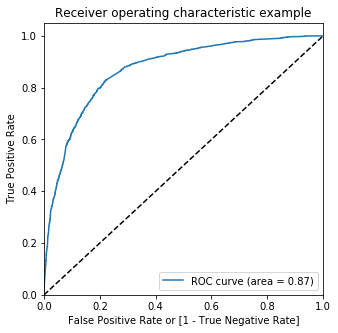

In [434]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


In [435]:
# **Finding Optimal Cutoff Point**

In [436]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.225605,3009,0,1,1,1,0,0,0,0,0,0,0
1012,0,0.036906,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.271713,9226,0,1,1,1,0,0,0,0,0,0,0
4750,1,0.906783,4750,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.758713,7987,1,1,1,1,1,1,1,1,1,0,0


In [437]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.578649  0.973835  0.331114
0.2   0.2  0.725712  0.914146  0.607682
0.3   0.3  0.779247  0.863859  0.726248
0.4   0.4  0.801449  0.760834  0.826889
0.5   0.5  0.800189  0.680294  0.875288
0.6   0.6  0.790269  0.600164  0.909347
0.7   0.7  0.759093  0.463205  0.944430
0.8   0.8  0.737522  0.372854  0.965941
0.9   0.9  0.693277  0.225266  0.986428


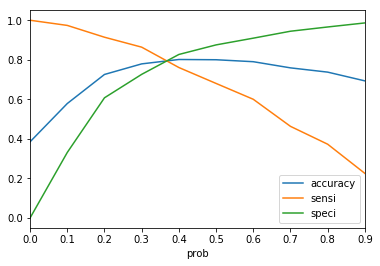

In [438]:
# Plotting accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [439]:
# From the above curve, 0.38 seems to be optimal cutoff probability

In [440]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.225605,3009,0,1,1,1,0,0,0,0,0,0,0,0
1012,0,0.036906,1012,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.271713,9226,0,1,1,1,0,0,0,0,0,0,0,0
4750,1,0.906783,4750,1,1,1,1,1,1,1,1,1,1,1,1
7987,1,0.758713,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [441]:
# Checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8012911352542906

In [442]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3172,  733],
       [ 529, 1917]], dtype=int64)

In [443]:
# Finding sensitivity 

TP / float(TP+FN)

0.8638593622240393

In [444]:
# Finding specificity

TN / float(TN+FP)

0.7262483994878361

In [445]:
# Finding false postive rate 

FP/ float(TN+FP)

0.2737516005121639

In [446]:
# FInding positive predictive value 

TP / float(TP+FP)

0.6640477686989315

In [447]:
# Finding negative predictive value

TN / float(TN+ FN)

0.8949195329757021

In [448]:
# Precision and Recall

In [449]:
## Checking confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2836, 1069],
       [ 333, 2113]], dtype=int64)

In [450]:
# Finding Precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6640477686989315

In [451]:
# FInding Recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8638593622240393

In [452]:
# Precision and Recall Tradeoff

In [453]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
 1281    1
 2880    0
 4971    1
 7536    1
 1248    0
 1429    0
 2178    0
 8554    0
 5044    1
 3475    1
 7424    1
 421     0
 3591    0
 6247    0
 7843    0
 1306    1
 2488    0
 2250    0
 7920    0
 2198    1
 5274    0
 1611    1
 3063    1
 1235    0
 3923    1
        ..
 2597    0
 4816    1
 926     0
 2       1
 3499    0
 4966    0
 3860    0
 4327    1
 2963    1
 5964    1
 7042    0
 3300    0
 5101    0
 1960    0
 5904    0
 2503    0
 6356    0
 5886    0
 7886    0
 1394    0
 4475    0
 839     1
 5760    0
 8056    1
 4245    1
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64, 3009    0
 1012    0
 9226    0
 4750    1
 7987    1
 1281    1
 2880    0
 4971    1
 7536    1
 1248    1
 1429    1
 2178    0
 8554    0
 5044    1
 3475    1
 7424    1
 421     0
 3591    0
 6247    0
 7843    1
 1306    0
 2488    0
 2250    0
 7920    0
 2198    1
 5274    

In [454]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

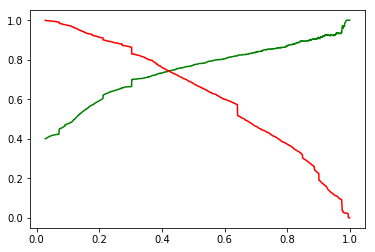

In [455]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [456]:
# 0.41 seems optimal tradeoff 

In [457]:
# ** Making predictions on the test set**

In [458]:
# Scaling the features

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Form Submitted on Website_N,Had a Phone Conversation_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N
3271,0,0,-0.038500,-0.770320,0.677172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.168189,1.935321,1.267848,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.451878,-0.935930,-0.504180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,0.788256,-0.756352,3.039875,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
X_test_pred= X_test # Creating another dataframe for merging at the last

X_test = X_test[col]

X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Import,Olark Chat,Reference,Welingak Website,Converted to Lead,Email Bounced_A,Had a Phone Conversation_A,Olark Chat Conversation_A,SMS Sent_A,Email Link Clicked_N,Email Opened_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N
3271,0,-0.770320,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.935321,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,-0.935930,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.592737,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.756352,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [460]:
X_test_sm = sm.add_constant(X_test)

In [461]:
# Making Predictions

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.148640
1490    0.759063
7936    0.127596
4216    0.848560
3830    0.150539
1800    0.128072
6507    0.402782
4821    0.348580
4223    0.973853
4714    0.271713
dtype: float64

In [462]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.148640
1490,0.759063
7936,0.127596
4216,0.848560
3830,0.150539


In [463]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [464]:
# Putting CustID to index

y_test_df['CustID'] = y_test_df.index

In [465]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [466]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,CustID,0
0,0,3271,0.148640
1,1,1490,0.759063
2,0,7936,0.127596
3,1,4216,0.848560
4,0,3830,0.150539


In [467]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [468]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,3271,0,0.148640
1,1490,1,0.759063
2,7936,0,0.127596
3,4216,1,0.848560
4,3830,0,0.150539


In [469]:
# Creating a final_predicted column with values 0 or 1 if Converted_Prob > or < 0.41 based on the Precision and Recall tradeoff

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,3271,0,0.148640,0
1,1490,1,0.759063,1
2,7936,0,0.127596,0
3,4216,1,0.848560,1
4,3830,0,0.150539,0


In [470]:
# Checking Overall Accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7983841351450606

In [471]:
# We are getting almost 80% accuracy which satisfies the business requirement

In [472]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1441,  293],
       [ 256,  733]], dtype=int64)

In [473]:
# Finding Sensitivity

TP / float(TP+FN)

0.8638593622240393

In [474]:
# Finding Specificity

TN / float(TN+FP)

0.7262483994878361

In [475]:
# Converting Converted_Prob into integers by multiplying it 100

In [476]:
y_pred_final['Converted_Prob'] = round(y_pred_final['Converted_Prob'] *100, 2)
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,3271,0,14.86,0
1,1490,1,75.91,1
2,7936,0,12.76,0
3,4216,1,84.86,1
4,3830,0,15.05,0


In [477]:
# Adding y_pred_final to X_test data

In [478]:
X_test_pred['CustID'] = X_test_pred.index
X_test_pred.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Had a Phone Conversation_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N,CustID
3271,0,0,-0.038500,-0.770320,0.677172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3271
1490,0,0,0.168189,1.935321,1.267848,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1490
7936,0,0,-0.451878,-0.935930,-0.504180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7936
4216,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4216
3830,0,0,0.788256,-0.756352,3.039875,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3830


In [479]:
# Changing the order of the columns

X_test_pred = X_test_pred[['CustID'] + X_test_pred.columns[:-1].tolist()]
X_test_pred.head()

,CustID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website_N,Had a Phone Conversation_N,Modified,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N
3271,3271,0,0,-0.038500,-0.770320,0.677172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,1490,0,0,0.168189,1.935321,1.267848,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,7936,0,0,-0.451878,-0.935930,-0.504180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,4216,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,3830,0,0,0.788256,-0.756352,3.039875,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [480]:
X_test_pred = pd.merge(X_test_pred, y_pred_final, how = 'inner', on = 'CustID')
X_test_pred.head()

,CustID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N,Converted,Converted_Prob,final_predicted
0,3271,0,0,-0.038500,-0.770320,0.677172,0,0,0,0,...,0,0,0,0,0,0,0,0,14.86,0
1,1490,0,0,0.168189,1.935321,1.267848,0,0,0,0,...,0,0,0,0,0,0,0,1,75.91,1
2,7936,0,0,-0.451878,-0.935930,-0.504180,0,0,0,0,...,0,0,0,0,0,0,0,0,12.76,0
3,4216,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,...,0,0,0,0,0,0,0,1,84.86,1
4,3830,0,0,0.788256,-0.756352,3.039875,0,0,0,0,...,0,0,0,0,0,0,0,0,15.05,0


In [481]:
# Sortting the probabilities in descending

X_test_pred = X_test_pred.sort_values(by=['Converted_Prob'], ascending=False)
X_test_pred.head()

,CustID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Olark Chat Conversation_N,Page Visited on Website_N,Resubscribed to emails_N,SMS Sent_N,Unreachable_N,Unsubscribed_N,View in browser link Clicked_N,Converted,Converted_Prob,final_predicted
1786,2011,0,0,-0.245189,1.791659,0.086496,0,0,0,0,...,0,0,0,1,0,0,0,1,99.79,1
868,2495,0,0,-0.451878,2.354336,-1.094856,0,0,0,0,...,0,0,0,0,0,0,0,1,99.45,1
70,3542,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,...,0,0,0,1,0,0,0,1,99.43,1
2401,6933,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,...,0,0,0,1,0,0,0,1,99.43,1
1585,3355,0,0,-0.245189,-0.592737,-0.504180,0,0,0,0,...,0,0,0,1,0,0,0,1,99.43,1


In [1]:
# Now we have a dataframe with the entire features with the probabilities of them being converted ranging from 0 to 100

In [2]:
!jupyter nbconvert --to html "Lead Score Assignment".ipynb

[NbConvertApp] Converting notebook Lead Score Assignment.ipynb to html
[NbConvertApp] Writing 3364469 bytes to Lead Score Assignment.html
